# Линейные модели в машинном обучении

## Цель проекта

Разработать модели машинного обучения, которые помогут фермеру из молочного хозяйства «Вольный луг» объективно отбирать бурёнок для расширения стада на основе следующих критериев:

1. Прогнозирование удоя коровы.
2. Оценка вероятности получения вкусного молока от коровы.

## Задачи проекта

1. **Разработка модели для прогнозирования удоя коровы:**
   - **Целевой признак:** Удой (количество молока в килограммах, которое корова может дать за год).
   - **Цель:** Создать модель, которая сможет прогнозировать удой коровы на основе предоставленных данных и определить, соответствует ли удой минимальному требованию в 6000 килограммов в год.

2. **Разработка модели для оценки вероятности получения вкусного молока:**
   - **Целевой признак:** Вкус молока (оценка соответствия молока требованиям по вкусу).
   - **Цель:** Создать модель, которая будет предсказывать вероятность того, что молоко от коровы будет вкусным по строгим критериям фермера.

## Критерии отбора бурёнок

1. **Средний удой за год:** Не менее 6000 килограммов.
2. **Качество молока:** Молоко должно соответствовать установленным критериям вкуса.

**Поставленные задачи:**  
- Построить прогнозную модель для определения удоя коровы.
- Построить прогнозную модель для оценки вероятности вкуса молока.
- Использовать обе модели для отбора коров, удовлетворяющих обоим критериям.


## Описание данных

### 1. `ferma_main.csv`
Этот файл содержит данные о текущем стаде фермера. Признаки в этом датасете можно разделить на несколько групп:

**Характеристики коровы:**
- **id** — уникальный идентификатор коровы.
- **Порода** — порода коровы.
- **порода папы_быка** — порода папы коровы.
- **Возраст** — возраст коровы (бинарный признак: менее_2_лет, более_2_лет).

**Характеристики корма:**
- **ЭКЕ (Энергетическая кормовая единица)** — показатель питательности корма коровы.
- **Сырой протеин, г** — содержание сырого протеина в корме (в граммах).
- **СПО (Сахаро-протеиновое соотношение)** — отношение сахара к протеину в корме коровы.

**Характеристика пастбища:**
- **Тип пастбища** — ландшафт лугов, на которых паслась корова.

**Характеристики молока:**
- **Удой, кг** — масса молока, которую корова даёт в год (в килограммах).
- **Жирность, %** — содержание жиров в молоке (в процентах).
- **Белок, %** — содержание белков в молоке (в процентах).
- **Вкус молока** — оценка вкуса по личным критериям фермера (бинарный признак: вкусно, не вкусно).

### 2. `ferma_dad.csv`
Этот файл содержит данные о папах коров в стаде фермера.

**Признаки:**
- **id** — уникальный идентификатор коровы.
- **Имя Папы** — имя папы коровы.

### 3. `cow_buy.csv`
Этот файл содержит данные о коровах, которые фермер хочет изучить перед покупкой.

**Признаки:**
- **Порода** — порода коровы.
- **Тип пастбища** — ландшафт лугов, на которых паслась корова.
- **порода папы_быка** — порода папы коровы.
- **Имя_папы** — имя папы коровы.
- **Текущая_жирность, %** — содержание жиров в молоке (в процентах) на момент продажи.
- **Текущий_уровень_белок, %** — содержание белков в молоке (в процентах) на момент продажи.
- **Возраст** — возраст коровы (бинарный признак: менее_2_лет, более_2_лет).

**Особенности:**
- Отсутствуют признаки **Удой, кг** и **Вкус молока**.
- Параметры корма (ЭКЕ, Сырой протеин, СПО) отсутствуют. Планируется увеличение значений каждого из этих параметров на 5% для новых коров.


## Загрузка данных

In [1]:
!pip install --upgrade scikit-learn

     |████████████████████████████████| 13.4 MB 2.6 MB/s eta 0:00:01
     |████████████████████████████████| 301 kB 89.2 MB/s eta 0:00:01
  Attempting uninstall: joblib
    Found existing installation: joblib 1.1.0
    Uninstalling joblib-1.1.0:
      Successfully uninstalled joblib-1.1.0
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 1.1.3
    Uninstalling scikit-learn-1.1.3:
      Successfully uninstalled scikit-learn-1.1.3


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, recall_score, precision_score, confusion_matrix
from sklearn.metrics import precision_score
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor


In [3]:
# Шаг 1: Загрузка данных
ferma_main = pd.read_csv('/datasets/ferma_main.csv', sep=';', decimal=',')
ferma_dad = pd.read_csv('/datasets/ferma_dad.csv', sep=';', decimal=',')
cow_buy = pd.read_csv('/datasets/cow_buy.csv', sep=';', decimal=',')

In [4]:
# Шаг 2: Изучение данных
# Изучение данных в ferma_main.csv
print("ferma_main.csv")
ferma_main.head()  


ferma_main.csv


id  Удой, кг  ЭКЕ (Энергетическая кормовая единица)  Сырой протеин, г  \
0   1      5863                                   14.2              1743   
1   2      5529                                   12.8              2138   
2   3      5810                                   14.0              1854   
3   4      5895                                   12.4              2012   
4   5      5302                                   12.8              1675   

   СПО (Сахаро-протеиновое соотношение)           Порода Тип пастбища  \
0                                 0.890   Вис Бик Айдиал    Равнинное   
1                                 0.890   Вис Бик Айдиал    Равнинные   
2                                 0.885  РефлешнСоверинг    Холмистое   
3                                 0.885  РефлешнСоверинг    Холмистое   
4                                 0.885   Вис Бик Айдиал    Равнинные   

  порода папы_быка  Жирность,%  Белок,% Вкус молока      Возраст  
0           Айдиал        3.58    3.076      вкусно  более_2_лет  
1          Соверин        3.54    3.079      вкусно  менее_2_лет  
2          Соверин        3.59    3.074   не вкусно  более_2_лет  
3           Айдиал        3.40    3.075   не вкусно  более_2_лет  
4          Соверин        3.73    3.073      вкусно  менее_2_лет

In [5]:
ferma_main.info()  # Информация о типах данных и наличии пропусков


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 634 entries, 0 to 633
Data columns (total 12 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   id                                     634 non-null    int64  
 1   Удой, кг                               634 non-null    int64  
 2   ЭКЕ (Энергетическая кормовая единица)  634 non-null    float64
 3   Сырой протеин, г                       634 non-null    int64  
 4   СПО (Сахаро-протеиновое соотношение)   634 non-null    float64
 5   Порода                                 634 non-null    object 
 6   Тип пастбища                           634 non-null    object 
 7   порода папы_быка                       634 non-null    object 
 8   Жирность,%                             634 non-null    float64
 9   Белок,%                                634 non-null    float64
 10  Вкус молока                            634 non-null    object 
 11  Возрас

In [6]:
ferma_main.describe()  # Статистическое описание числовых признаков


id      Удой, кг  ЭКЕ (Энергетическая кормовая единица)  \
count  634.000000    634.000000                             634.000000   
mean   317.460568   6187.025237                              14.542744   
std    183.096982   1638.401021                               1.301301   
min      1.000000   5204.000000                              10.900000   
25%    159.250000   5751.750000                              13.500000   
50%    317.500000   6130.500000                              14.700000   
75%    475.750000   6501.000000                              15.600000   
max    629.000000  45616.000000                              16.800000   

       Сырой протеин, г  СПО (Сахаро-протеиновое соотношение)  Жирность,%  \
count        634.000000                            634.000000  634.000000   
mean        1922.682965                              0.912855    3.603943   
std          182.392548                              0.032209    0.168020   
min         1660.000000                              0.840000    2.990000   
25%         1772.250000                              0.890000    3.590000   
50%         1880.500000                              0.930000    3.650000   
75%         2058.750000                              0.940000    3.720000   
max         2349.000000                              0.960000    3.750000   

          Белок,%  
count  634.000000  
mean     3.075666  
std      0.002540  
min      3.069000  
25%      3.074000  
50%      3.076000  
75%      3.077000  
max      3.085000

In [7]:
# Изучение данных в ferma_dad.csv
print("\nferma_dad.csv")
ferma_dad.head() 


ferma_dad.csv


id  Имя Папы
0   1    Буйный
1   2  Соловчик
2   3     Барин
3   4    Буйный
4   5     Барин

In [8]:
ferma_dad.info()  

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 629 entries, 0 to 628
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   id        629 non-null    int64 
 1   Имя Папы  629 non-null    object
dtypes: int64(1), object(1)
memory usage: 10.0+ KB


In [9]:
# Изучение данных в cow_buy.csv
print("\ncow_buy.csv")
cow_buy.head()  




cow_buy.csv


Порода Тип пастбища порода папы_быка  Имя_папы  \
0   Вис Бик Айдиал    холмистое           Айдиал  Геркулес   
1   Вис Бик Айдиал    равнинное          Соверин    Буйный   
2  РефлешнСоверинг    равнинное          Соверин     Барин   
3  РефлешнСоверинг    холмистое           Айдиал    Буйный   
4  РефлешнСоверинг    равнинное           Айдиал    Буйный   

   Текущая_жирность,%  Текущий_уровень_белок,%      Возраст  
0                3.58                    3.076  более_2_лет  
1                3.54                    3.081  менее_2_лет  
2                3.59                    3.074  более_2_лет  
3                3.40                    3.061  более_2_лет  
4                3.64                    3.074  более_2_лет

In [10]:
cow_buy.info()  

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 7 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Порода                   20 non-null     object 
 1   Тип пастбища             20 non-null     object 
 2   порода папы_быка         20 non-null     object 
 3   Имя_папы                 20 non-null     object 
 4   Текущая_жирность,%       20 non-null     float64
 5   Текущий_уровень_белок,%  20 non-null     float64
 6   Возраст                  20 non-null     object 
dtypes: float64(2), object(5)
memory usage: 1.2+ KB



**Рекомендации:**
- Обновить названия столбцов во всех датафреймах.

- **`ferma_main.csv`**:
   - Пропущенных значений не выявлено.
   - Столбцы ЭКЕ, СПО, `Жирность,%` и `Белок,%` представлены как строки. Необходимо преобразовать строковые значения в числовые.
- **`ferma_dad.csv`** и **`cow_buy.csv`**:
   - Пропущенных значений не выявлено.
   - Все типы данных проверены и соответствуют ожидаемым.


##  Предобработка данных

In [11]:
# Словари для переименования столбцов
rename_ferma_main = {
    'id': 'id',
    'Удой, кг': 'udoy_kg',
    'ЭКЕ (Энергетическая кормовая единица)': 'eke',
    'Сырой протеин, г': 'protein_g',
    'СПО (Сахаро-протеиновое соотношение)': 'spo',
    'Порода': 'poroda',
    'Тип пастбища': 'pastbishche',
    'порода папы_быка': 'dad_breed',
    'Жирность,%': 'fat',
    'Белок,%': 'protein',
    'Вкус молока': 'taste',
    'Возраст': 'age'
}

rename_ferma_dad = {
    'id': 'id',
    'Имя Папы': 'dad_name'
}

rename_cow_buy = {
    'Порода': 'poroda',
    'Тип пастбища': 'pastbishche',
    'порода папы_быка': 'dad_breed',
    'Имя_папы': 'dad_name',
    'Текущая_жирность,%': 'fat',
    'Текущий_уровень_белок,%': 'protein',
    'Возраст': 'age'
}

# Переименование столбцов
ferma_main.rename(columns=rename_ferma_main, inplace=True)
ferma_dad.rename(columns=rename_ferma_dad, inplace=True)
cow_buy.rename(columns=rename_cow_buy, inplace=True)

ferma_main.head()    

id  udoy_kg   eke  protein_g    spo           poroda pastbishche dad_breed  \
0   1     5863  14.2       1743  0.890   Вис Бик Айдиал   Равнинное    Айдиал   
1   2     5529  12.8       2138  0.890   Вис Бик Айдиал   Равнинные   Соверин   
2   3     5810  14.0       1854  0.885  РефлешнСоверинг   Холмистое   Соверин   
3   4     5895  12.4       2012  0.885  РефлешнСоверинг   Холмистое    Айдиал   
4   5     5302  12.8       1675  0.885   Вис Бик Айдиал   Равнинные   Соверин   

    fat  protein      taste          age  
0  3.58    3.076     вкусно  более_2_лет  
1  3.54    3.079     вкусно  менее_2_лет  
2  3.59    3.074  не вкусно  более_2_лет  
3  3.40    3.075  не вкусно  более_2_лет  
4  3.73    3.073     вкусно  менее_2_лет

In [12]:
ferma_dad.head()

id  dad_name
0   1    Буйный
1   2  Соловчик
2   3     Барин
3   4    Буйный
4   5     Барин

In [13]:
cow_buy.head()

poroda pastbishche dad_breed  dad_name   fat  protein          age
0   Вис Бик Айдиал   холмистое    Айдиал  Геркулес  3.58    3.076  более_2_лет
1   Вис Бик Айдиал   равнинное   Соверин    Буйный  3.54    3.081  менее_2_лет
2  РефлешнСоверинг   равнинное   Соверин     Барин  3.59    3.074  более_2_лет
3  РефлешнСоверинг   холмистое    Айдиал    Буйный  3.40    3.061  более_2_лет
4  РефлешнСоверинг   равнинное    Айдиал    Буйный  3.64    3.074  более_2_лет

In [14]:
# Приведение типов данных
ferma_main['eke'] = ferma_main['eke'].astype(float)
ferma_main['spo'] = ferma_main['spo'].astype(float)
ferma_main['fat'] = ferma_main['fat'].astype(float)
ferma_main['protein'] = ferma_main['protein'].astype(float)
ferma_main.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 634 entries, 0 to 633
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           634 non-null    int64  
 1   udoy_kg      634 non-null    int64  
 2   eke          634 non-null    float64
 3   protein_g    634 non-null    int64  
 4   spo          634 non-null    float64
 5   poroda       634 non-null    object 
 6   pastbishche  634 non-null    object 
 7   dad_breed    634 non-null    object 
 8   fat          634 non-null    float64
 9   protein      634 non-null    float64
 10  taste        634 non-null    object 
 11  age          634 non-null    object 
dtypes: float64(4), int64(3), object(5)
memory usage: 59.6+ KB


In [15]:
cow_buy['fat'] = cow_buy['fat'].astype(float)
cow_buy['protein'] = cow_buy['protein'].astype(float)
cow_buy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   poroda       20 non-null     object 
 1   pastbishche  20 non-null     object 
 2   dad_breed    20 non-null     object 
 3   dad_name     20 non-null     object 
 4   fat          20 non-null     float64
 5   protein      20 non-null     float64
 6   age          20 non-null     object 
dtypes: float64(2), object(5)
memory usage: 1.2+ KB


In [16]:
# Приведем значения строковые значения столбцов к нижнему регистру

def convert_to_lowercase(df):
    """Преобразует все значения в столбцах датафрейма в строчные буквы, если это строки."""
    # Применяем функцию преобразования только к строковым значениям
    df_lower = df.applymap(lambda x: x.lower() if isinstance(x, str) else x)
    return df_lower

# Преобразование всех значений к строчным буквам
ferma_main = convert_to_lowercase(ferma_main)
ferma_dad = convert_to_lowercase(ferma_dad)
cow_buy = convert_to_lowercase(cow_buy)

# Проверка результатов
print("ferma_main (нижний регистр):")
ferma_main.head()


ferma_main (нижний регистр):


id  udoy_kg   eke  protein_g    spo           poroda pastbishche dad_breed  \
0   1     5863  14.2       1743  0.890   вис бик айдиал   равнинное    айдиал   
1   2     5529  12.8       2138  0.890   вис бик айдиал   равнинные   соверин   
2   3     5810  14.0       1854  0.885  рефлешнсоверинг   холмистое   соверин   
3   4     5895  12.4       2012  0.885  рефлешнсоверинг   холмистое    айдиал   
4   5     5302  12.8       1675  0.885   вис бик айдиал   равнинные   соверин   

    fat  protein      taste          age  
0  3.58    3.076     вкусно  более_2_лет  
1  3.54    3.079     вкусно  менее_2_лет  
2  3.59    3.074  не вкусно  более_2_лет  
3  3.40    3.075  не вкусно  более_2_лет  
4  3.73    3.073     вкусно  менее_2_лет

In [17]:

print("ferma_dad (нижний регистр):")
ferma_dad.head()


ferma_dad (нижний регистр):


id  dad_name
0   1    буйный
1   2  соловчик
2   3     барин
3   4    буйный
4   5     барин

In [18]:

print("cow_buy (нижний регистр):")
cow_buy.head()


cow_buy (нижний регистр):


poroda pastbishche dad_breed  dad_name   fat  protein          age
0   вис бик айдиал   холмистое    айдиал  геркулес  3.58    3.076  более_2_лет
1   вис бик айдиал   равнинное   соверин    буйный  3.54    3.081  менее_2_лет
2  рефлешнсоверинг   равнинное   соверин     барин  3.59    3.074  более_2_лет
3  рефлешнсоверинг   холмистое    айдиал    буйный  3.40    3.061  более_2_лет
4  рефлешнсоверинг   равнинное    айдиал    буйный  3.64    3.074  более_2_лет

In [19]:
def check_duplicates(df):
    """Проверяет наличие явных дубликатов в датафрейме и возвращает количество дубликатов и сами дубликаты."""
    duplicates = df[df.duplicated()]
    num_duplicates = len(duplicates)
    return num_duplicates, duplicates

# Проверка дубликатов в каждом датафрейме
num_duplicates_ferma_main, duplicates_ferma_main = check_duplicates(ferma_main)
num_duplicates_ferma_dad, duplicates_ferma_dad = check_duplicates(ferma_dad)
num_duplicates_cow_buy, duplicates_cow_buy = check_duplicates(cow_buy)

# Вывод результатов
print(f"В 'ferma_main' найдено {num_duplicates_ferma_main} явных дубликатов.")
duplicates_ferma_main


В 'ferma_main' найдено 5 явных дубликатов.


id  udoy_kg   eke  protein_g   spo           poroda pastbishche  \
629  627     5970  14.4       1837  0.88  рефлешнсоверинг   холмистое   
630  627     5970  14.4       1837  0.88  рефлешнсоверинг   холмистое   
631  627     5970  14.4       1837  0.88  рефлешнсоверинг   холмистое   
632  627     5970  14.4       1837  0.88  рефлешнсоверинг   холмистое   
633  627     5970  14.4       1837  0.88  рефлешнсоверинг   холмистое   

    dad_breed   fat  protein      taste          age  
629   соверин  3.64    3.075  не вкусно  более_2_лет  
630   соверин  3.64    3.075  не вкусно  более_2_лет  
631   соверин  3.64    3.075  не вкусно  более_2_лет  
632   соверин  3.64    3.075  не вкусно  более_2_лет  
633   соверин  3.64    3.075  не вкусно  более_2_лет

In [20]:

print(f"В 'ferma_dad' найдено {num_duplicates_ferma_dad} явных дубликатов.")
duplicates_ferma_dad


В 'ferma_dad' найдено 0 явных дубликатов.


Empty DataFrame
Columns: [id, dad_name]
Index: []

In [21]:
print(f"В 'cow_buy' найдено {num_duplicates_cow_buy} явных дубликатов.")
duplicates_cow_buy


В 'cow_buy' найдено 4 явных дубликатов.


poroda pastbishche dad_breed  dad_name   fat  protein  \
6    вис бик айдиал   холмистое    айдиал  геркулес  3.58    3.076   
8   рефлешнсоверинг   равнинное   соверин     барин  3.59    3.074   
14  рефлешнсоверинг   равнинное   соверин     барин  3.59    3.074   
19  рефлешнсоверинг   равнинное    айдиал    буйный  3.64    3.074   

            age  
6   более_2_лет  
8   более_2_лет  
14  более_2_лет  
19  более_2_лет

### Проверка явных дубликатов в датафреймах

- **`ferma_main`**: 5 явных дубликатов.
  Все дубликаты имеют одинаковые значения, которые следует удалить.

- **`ferma_dad`**: 0 явных дубликатов.
  Нет явных дубликатов в этом датафрейме, что означает, что каждая запись уникальна.

- **`cow_buy`**: 4 явных дубликата.
  Дубликаты имеют некоторые повторяющиеся значения, но удалять мы их не будем, так как именно этих коров хочет изучить фермер, всего 20 записей.


In [22]:
print("Датафрейм 'ferma_main' до удаления дубликатов:")
len(ferma_main)

Датафрейм 'ferma_main' до удаления дубликатов:


634

In [23]:
ferma_main = ferma_main.drop_duplicates()
print("Датафрейм 'ferma_main' после удаления дубликатов:")
len(ferma_main)

Датафрейм 'ferma_main' после удаления дубликатов:


629

In [24]:

def unique_string_values(df, columns):

    results = []
    
    for col in columns:
        if df[col].dtype == 'object': 
            value_counts = df[col].value_counts()
            for value, count in value_counts.items():
                results.append((col, value, count))
    
    return pd.DataFrame(results, columns=['Column', 'Value', 'Count'])

# Применение функции к датафреймам 
ferma_main_columns = [
    'poroda', 'pastbishche', 'dad_breed','taste', 'age'
]
ferma_dad_columns = ['dad_name']
cow_buy_columns = [
    'poroda', 'pastbishche', 'dad_breed', 'dad_name', 
    'age'
]

# Применение функции
ferma_main_unique = unique_string_values(ferma_main, ferma_main_columns)
ferma_dad_unique = unique_string_values(ferma_dad, ferma_dad_columns)
cow_buy_unique = unique_string_values(cow_buy, cow_buy_columns)

print("Уникальные значения в ferma_main:")
ferma_main_unique




Уникальные значения в ferma_main:


Column            Value  Count
0        poroda   вис бик айдиал    373
1        poroda  рефлешнсоверинг    256
2   pastbishche        холмистое    351
3   pastbishche        равнинное    253
4   pastbishche        равнинные     25
5     dad_breed          соверин    311
6     dad_breed           айдиал    240
7     dad_breed          айдиалл     78
8         taste           вкусно    371
9         taste        не вкусно    258
10          age      более_2_лет    519
11          age      менее_2_лет    110

In [25]:
print("Уникальные  в ferma_dad:")
ferma_dad_unique


Уникальные  в ferma_dad:


Column     Value  Count
0  dad_name     барин    240
1  dad_name    буйный    215
2  dad_name  соловчик    110
3  dad_name  геркулес     64

In [26]:
print("Уникальные значения в cow_buy:")
cow_buy_unique

Уникальные значения в cow_buy:


Column            Value  Count
0        poroda  рефлешнсоверинг     11
1        poroda   вис бик айдиал      9
2   pastbishche        равнинное     11
3   pastbishche        холмистое      9
4     dad_breed          соверин     12
5     dad_breed           айдиал      8
6      dad_name           буйный      8
7      dad_name         геркулес      6
8      dad_name            барин      4
9      dad_name         соловчик      2
10          age      более_2_лет     15
11          age      менее_2_лет      5

In [27]:
ferma_main['pastbishche'] = ferma_main['pastbishche'].str.replace('равнинные','равнинное')
ferma_main['pastbishche'].unique()

array(['равнинное', 'холмистое'], dtype=object)

In [28]:
ferma_main['dad_breed'] = ferma_main['dad_breed'].str.replace('айдиалл','айдиал')
ferma_main['dad_breed'].unique()

array(['айдиал', 'соверин'], dtype=object)

In [29]:
ferma_main.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 629 entries, 0 to 628
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           629 non-null    int64  
 1   udoy_kg      629 non-null    int64  
 2   eke          629 non-null    float64
 3   protein_g    629 non-null    int64  
 4   spo          629 non-null    float64
 5   poroda       629 non-null    object 
 6   pastbishche  629 non-null    object 
 7   dad_breed    629 non-null    object 
 8   fat          629 non-null    float64
 9   protein      629 non-null    float64
 10  taste        629 non-null    object 
 11  age          629 non-null    object 
dtypes: float64(4), int64(3), object(5)
memory usage: 63.9+ KB


## Предобработка данных, что было сделано

- Проведено переименование столбцов в трех датафреймах (`ferma_main`, `ferma_dad`, `cow_buy`) для единообразия.

- Преобразование строковых представлений чисел в формат `float` для столбцов, содержащих числовые данные (eke, spo, fat, protein).

- Все строковые значения в датафреймах были преобразованы в нижний регистр.

- Проверены датафреймы на наличие явных дубликатов:
  - `ferma_main`: обнаружены и удалены 5 дубликатов.
  - `ferma_dad`: не найдено явных дубликатов.
  - `cow_buy`: обнаружены 4 дубликата, но они оставлены, так как датафрейм содержит ограниченное количество записей.

- В `ferma_main` выполнена замена неявных дубликатов в столбцах `pastbishche` и `dad_breed`.


## Исследовательский анализ данных

In [30]:
ferma_main.describe()

id       udoy_kg         eke    protein_g         spo  \
count  629.00000    629.000000  629.000000   629.000000  629.000000   
mean   315.00000   6188.750397   14.543879  1923.364070    0.913116   
std    181.72094   1644.795489    1.306408   182.956251    0.032203   
min      1.00000   5204.000000   10.900000  1660.000000    0.840000   
25%    158.00000   5751.000000   13.500000  1771.000000    0.890000   
50%    315.00000   6133.000000   14.700000  1888.000000    0.930000   
75%    472.00000   6501.000000   15.600000  2062.000000    0.940000   
max    629.00000  45616.000000   16.800000  2349.000000    0.960000   

              fat     protein  
count  629.000000  629.000000  
mean     3.603657    3.075671  
std      0.168656    0.002549  
min      2.990000    3.069000  
25%      3.590000    3.074000  
50%      3.650000    3.076000  
75%      3.720000    3.077000  
max      3.750000    3.085000

In [31]:
# Максимальное значение удоя - выброс, удалим выброс
ferma_main = ferma_main[ferma_main['udoy_kg'] < 45000]

In [32]:
ferma_main.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 628 entries, 0 to 628
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           628 non-null    int64  
 1   udoy_kg      628 non-null    int64  
 2   eke          628 non-null    float64
 3   protein_g    628 non-null    int64  
 4   spo          628 non-null    float64
 5   poroda       628 non-null    object 
 6   pastbishche  628 non-null    object 
 7   dad_breed    628 non-null    object 
 8   fat          628 non-null    float64
 9   protein      628 non-null    float64
 10  taste        628 non-null    object 
 11  age          628 non-null    object 
dtypes: float64(4), int64(3), object(5)
memory usage: 63.8+ KB


In [33]:
ferma_main.describe()

id      udoy_kg         eke    protein_g         spo  \
count  628.000000   628.000000  628.000000   628.000000  628.000000   
mean   315.474522  6125.968153   14.548726  1923.759554    0.913089   
std    181.475367   475.857053    1.301777   182.832816    0.032221   
min      1.000000  5204.000000   10.900000  1660.000000    0.840000   
25%    158.750000  5749.750000   13.500000  1771.750000    0.890000   
50%    315.500000  6132.500000   14.700000  1888.000000    0.930000   
75%    472.250000  6501.000000   15.600000  2062.250000    0.940000   
max    629.000000  7222.000000   16.800000  2349.000000    0.960000   

              fat     protein  
count  628.000000  628.000000  
mean     3.604268    3.075670  
std      0.168093    0.002551  
min      2.990000    3.069000  
25%      3.590000    3.074000  
50%      3.650000    3.076000  
75%      3.720000    3.077000  
max      3.750000    3.085000

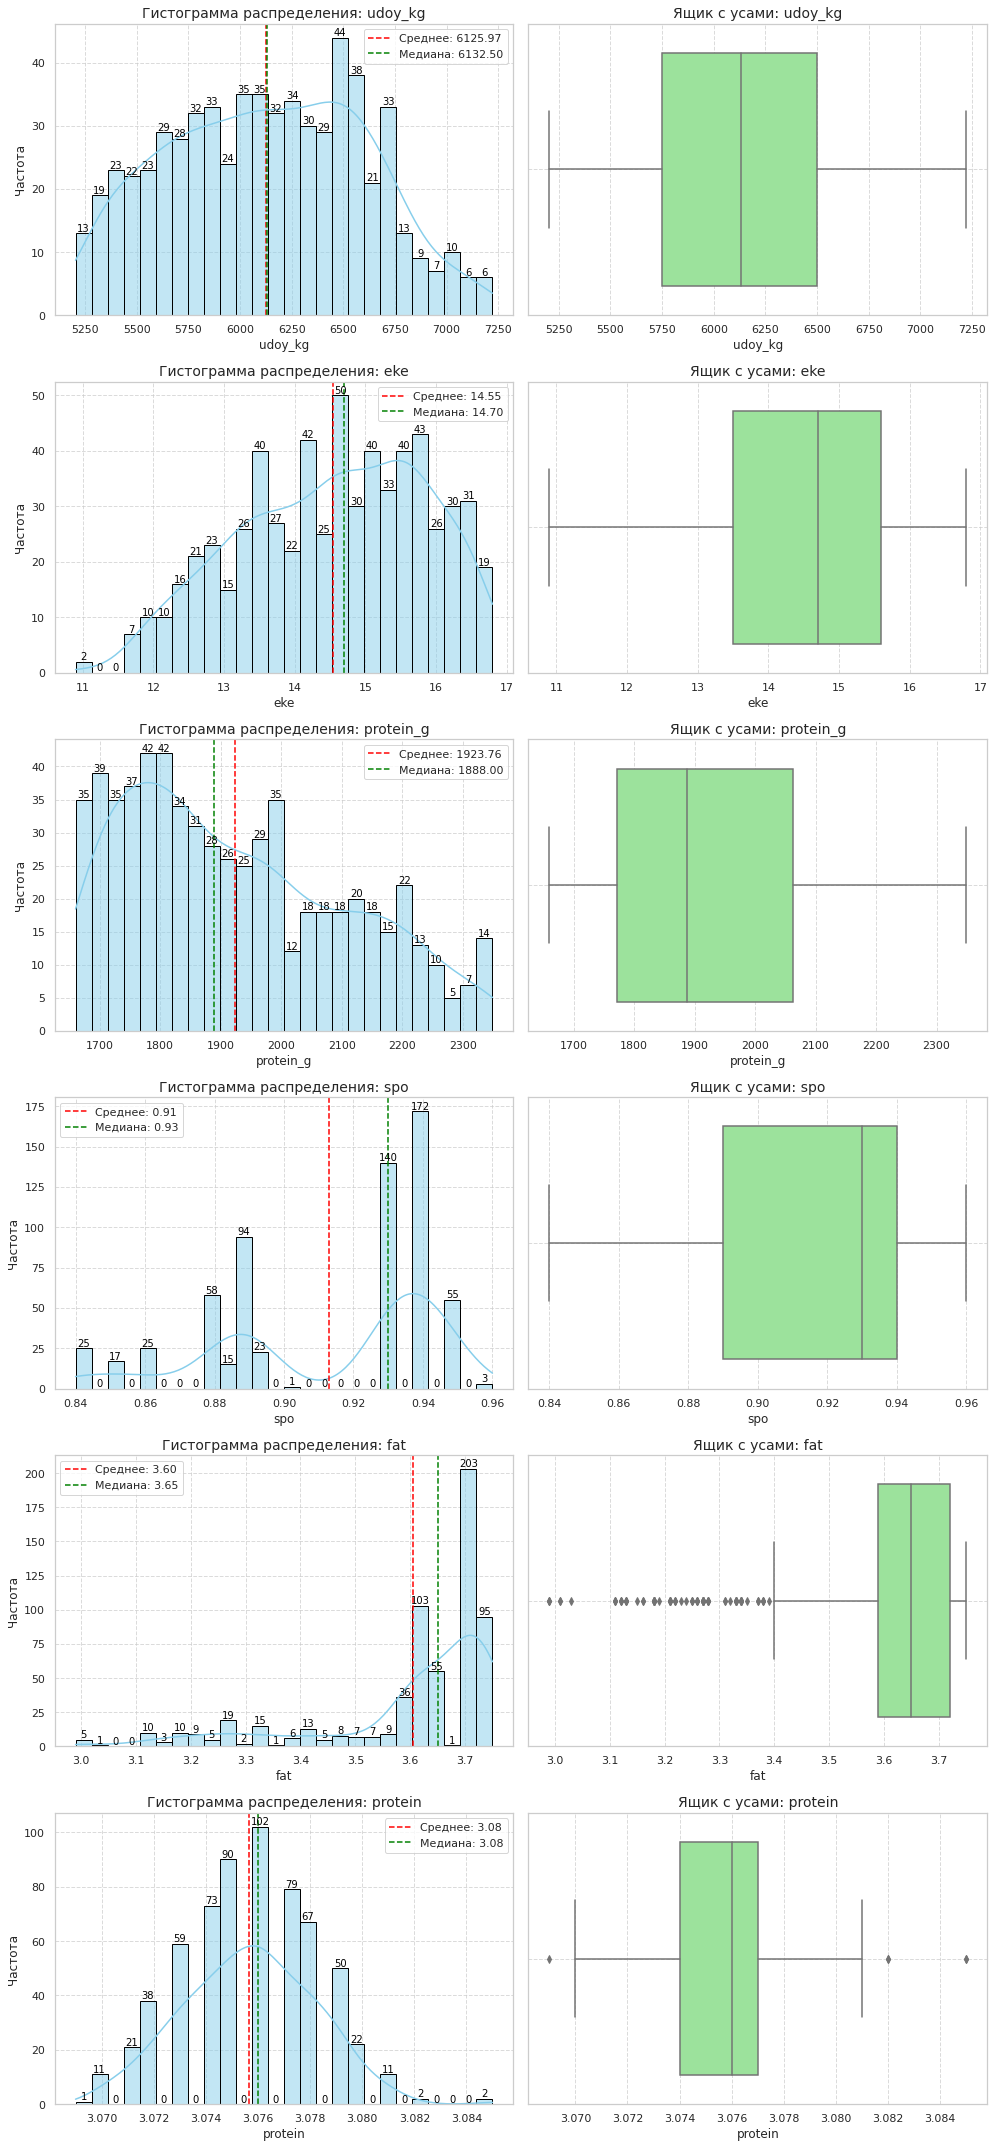

In [34]:

def optimal_bins(data):
    """Вычисляет оптимальное количество корзин для гистограммы по правилу Стерджена."""
    n = len(data)
    return int(np.ceil(np.sqrt(n)))

# Функция для построения гистограмм и ящиков с усами
def plot_distribution(df, columns):
    """
    Строит гистограммы и ящики с усами для указанных столбцов датафрейма.
    Оптимальное количество корзин вычисляется по правилу Стерджена.
    """
    num_cols = len(columns)
    sns.set(style="whitegrid")  # Настройка стиля графиков
    fig, axes = plt.subplots(num_cols, 2, figsize=(14, 5 * num_cols))
    
    if num_cols == 1:
        axes = [axes]
    
    for i, col in enumerate(columns):
        # Оптимальное количество корзин
        bins = optimal_bins(df[col])
        
        # Гистограмма
        hist_data = df[col]
        sns.histplot(hist_data, bins=bins, kde=True, ax=axes[i, 0], color='skyblue', edgecolor='black')
        
        # Получение данных для аннотаций
        patches = axes[i, 0].patches
        for patch in patches:
            height = patch.get_height()
            width = patch.get_width()
            x = patch.get_x() + width / 2
            y = height
            axes[i, 0].text(x, y, f'{int(height)}', ha='center', va='bottom', fontsize=10, color='black')
        
        # Добавление средних и медианных линий
        mean = hist_data.mean()
        median = hist_data.median()
        axes[i, 0].axvline(mean, color='red', linestyle='dashed', linewidth=1.5, label=f'Среднее: {mean:.2f}')
        axes[i, 0].axvline(median, color='green', linestyle='dashed', linewidth=1.5, label=f'Медиана: {median:.2f}')
        
        # Оформление графика
        axes[i, 0].set_title(f'Гистограмма распределения: {col}', fontsize=14)
        axes[i, 0].set_xlabel(col, fontsize=12)
        axes[i, 0].set_ylabel('Частота', fontsize=12)
        axes[i, 0].legend()
        axes[i, 0].grid(True, linestyle='--', alpha=0.7)
        
        # Ящик с усами
        sns.boxplot(x=hist_data, ax=axes[i, 1], color='lightgreen')
        axes[i, 1].set_title(f'Ящик с усами: {col}', fontsize=14)
        axes[i, 1].set_xlabel(col, fontsize=12)
        axes[i, 1].grid(True, linestyle='--', alpha=0.7)
    
    plt.tight_layout()
    plt.show()

# Построение графиков для выбранных столбцов
plot_distribution(df=ferma_main, columns=['udoy_kg', 'eke', 'protein_g', 'spo', 'fat', 'protein'])



### 1. **`udoy_kg`**
- Нормальное распределение с асимметрией на краях.

### 2. **`eke`**
- Нормальное распределение с левым скосом.

### 3. **`protein_g`**
- Нормальное распределение с правым скосом.

### 4. **`spo`**
- Неравномерное распределение имеет несколько отчетливых пиков, с сильными концентрациями и пробелами.

### 5. **`fat`**
- Неравномерное распределение демонстрирует несколько пиков, особенно в интервале 3.6 - 3.7, с очень высоким числом случаев в этих интервалах.

### 6. **`protein`**
- Нормальное распределение.


In [35]:
ferma_main.describe()

id      udoy_kg         eke    protein_g         spo  \
count  628.000000   628.000000  628.000000   628.000000  628.000000   
mean   315.474522  6125.968153   14.548726  1923.759554    0.913089   
std    181.475367   475.857053    1.301777   182.832816    0.032221   
min      1.000000  5204.000000   10.900000  1660.000000    0.840000   
25%    158.750000  5749.750000   13.500000  1771.750000    0.890000   
50%    315.500000  6132.500000   14.700000  1888.000000    0.930000   
75%    472.250000  6501.000000   15.600000  2062.250000    0.940000   
max    629.000000  7222.000000   16.800000  2349.000000    0.960000   

              fat     protein  
count  628.000000  628.000000  
mean     3.604268    3.075670  
std      0.168093    0.002551  
min      2.990000    3.069000  
25%      3.590000    3.074000  
50%      3.650000    3.076000  
75%      3.720000    3.077000  
max      3.750000    3.085000

In [36]:
ferma_main.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 628 entries, 0 to 628
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           628 non-null    int64  
 1   udoy_kg      628 non-null    int64  
 2   eke          628 non-null    float64
 3   protein_g    628 non-null    int64  
 4   spo          628 non-null    float64
 5   poroda       628 non-null    object 
 6   pastbishche  628 non-null    object 
 7   dad_breed    628 non-null    object 
 8   fat          628 non-null    float64
 9   protein      628 non-null    float64
 10  taste        628 non-null    object 
 11  age          628 non-null    object 
dtypes: float64(4), int64(3), object(5)
memory usage: 63.8+ KB


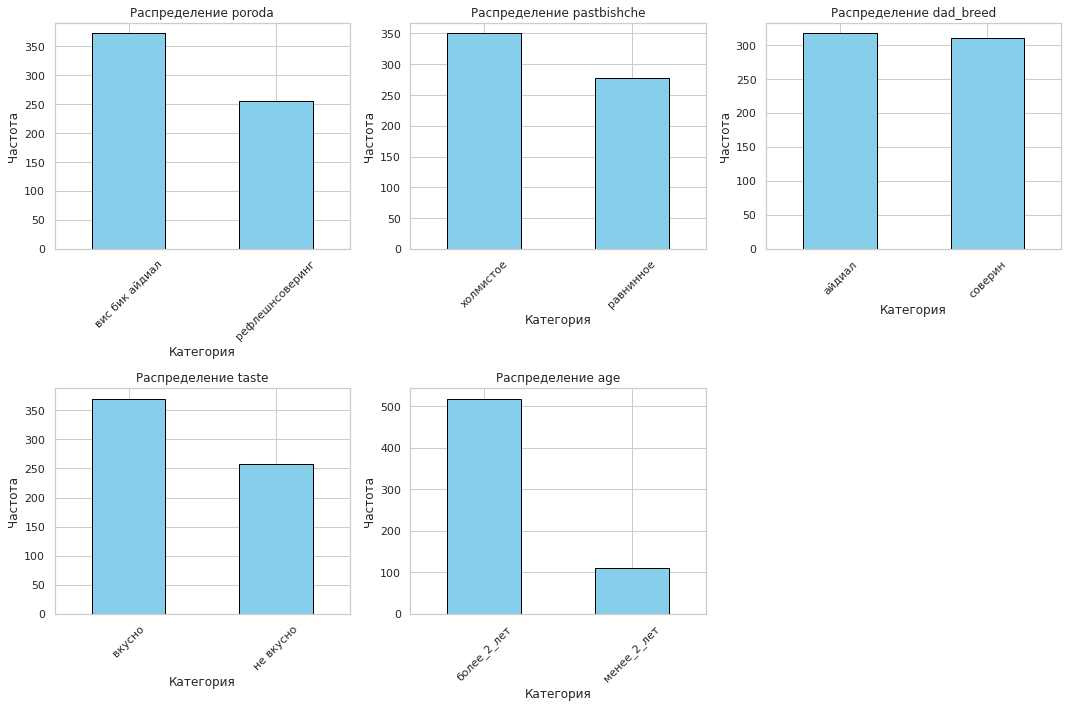

In [37]:
def plot_categorical_features(df):
    # Проверяем, есть ли категориальные признаки в DataFrame
    categorical_features = df.select_dtypes(include=['object']).columns

    # Определяем количество графиков
    num_features = len(categorical_features)
    num_cols = 3  # Количество столбцов в макете графиков
    num_rows = (num_features // num_cols) + (num_features % num_cols > 0)  # Количество строк в макете графиков

    # Создаем подграфики
    fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 5 * num_rows))
    axes = axes.flatten()  # Преобразуем двумерный массив в одномерный для удобства

    # Строим графики для каждого категориального признака
    for i, feature in enumerate(categorical_features):
        df[feature].value_counts().plot(kind='bar', ax=axes[i], color='skyblue', edgecolor='black')
        axes[i].set_title(f'Распределение {feature}')
        axes[i].set_xlabel('Категория')
        axes[i].set_ylabel('Частота')
        axes[i].tick_params(axis='x', rotation=45)
    # Убираем пустые графики, если количество признаков меньше количества подграфиков
    for j in range(i + 1, len(axes)):
        fig.delaxes(axes[j])

    plt.tight_layout()
    plt.show()


plot_categorical_features(ferma_main)


**Распределения категориальных переменных без выбросов и особенностей**

## Корреляционный анализ

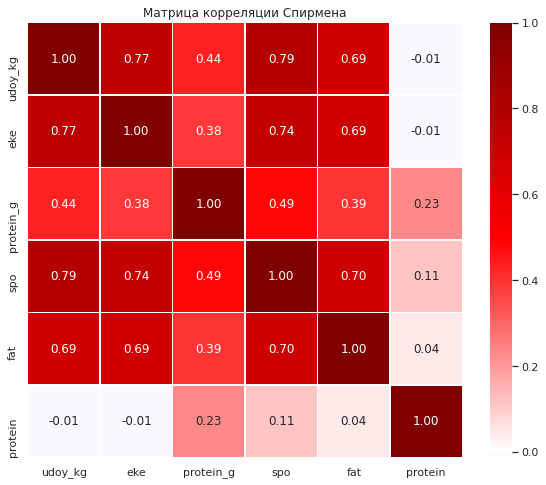

In [38]:
# Рассчитайте корреляцию Спирмена
correlation_matrix = ferma_main[['udoy_kg', 'eke', 'protein_g', 'spo', 'fat', 'protein']].corr(method='spearman')

# Постройте тепловую карту
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='seismic', center=0, square=True, linewidths=0.5)
plt.title('Матрица корреляции Спирмена')
plt.show()

### Корреляции между `udoy_kg` и другими признаками:

- **`eke`**: Высокая положительная корреляция (**0.77**).
- **`protein_g`**: Средняя положительная корреляция (**0.44**).
- **`spo`**: Высокая положительная корреляция (**0.79**).
- **`fat`**: Средняя положительная корреляция (**0.69**).
- **`protein`**: Нет связи (**-0.01**).

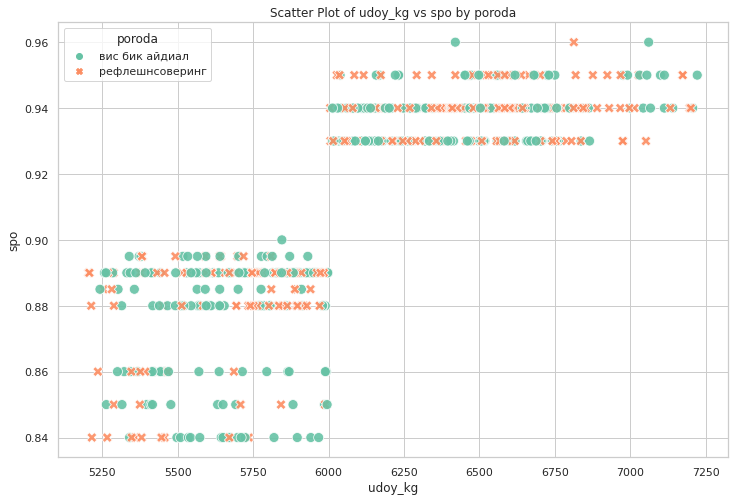

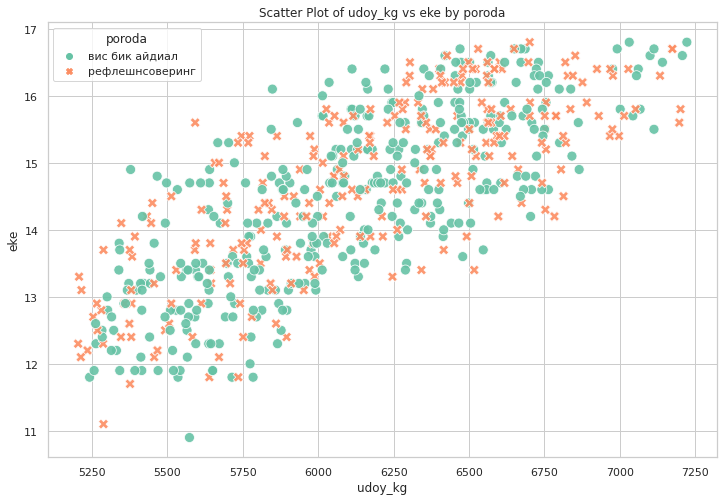

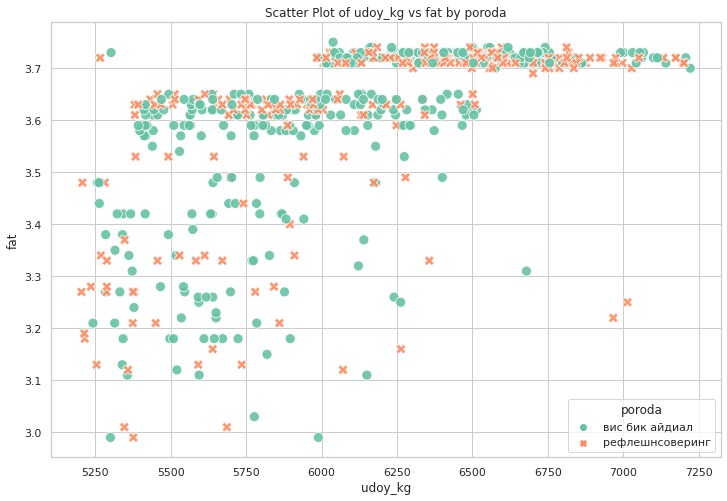

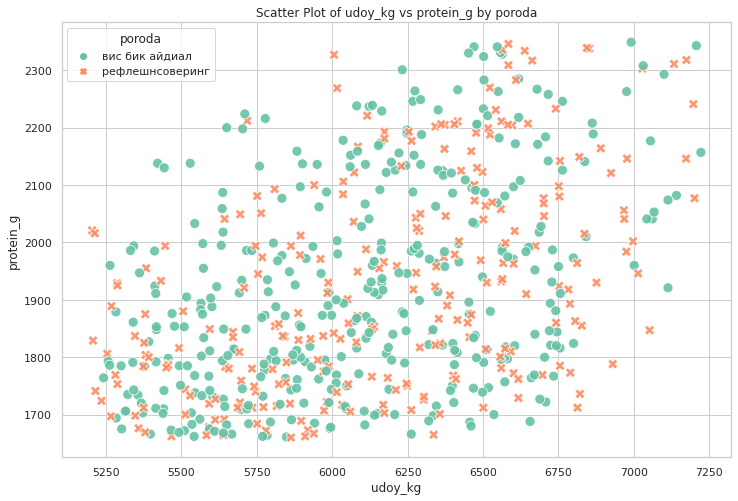

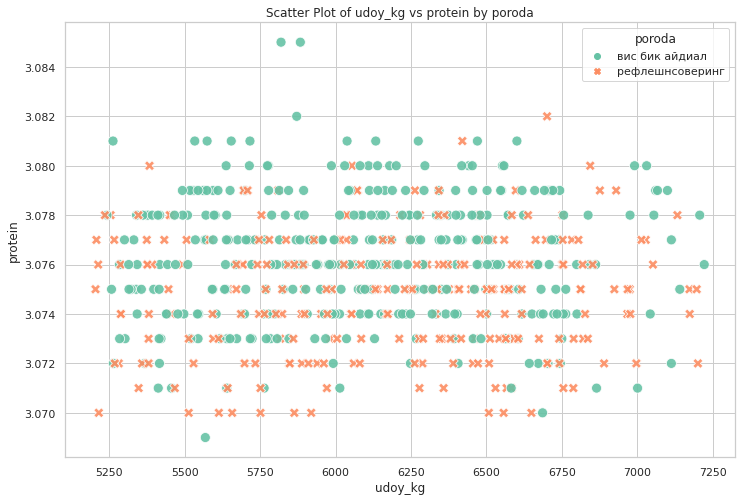

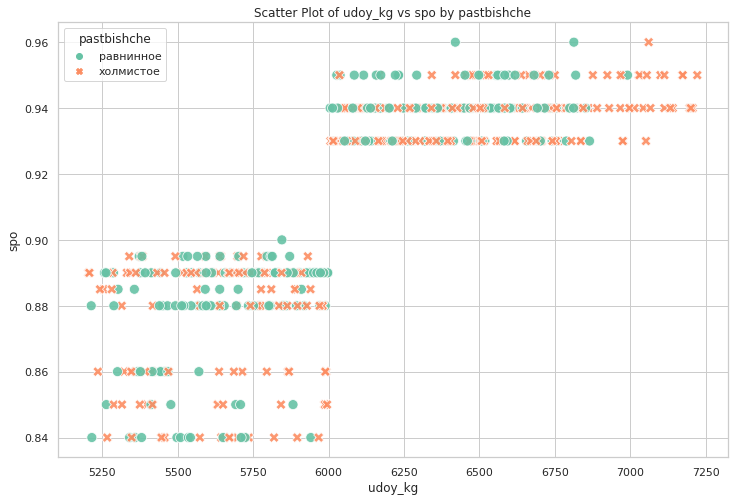

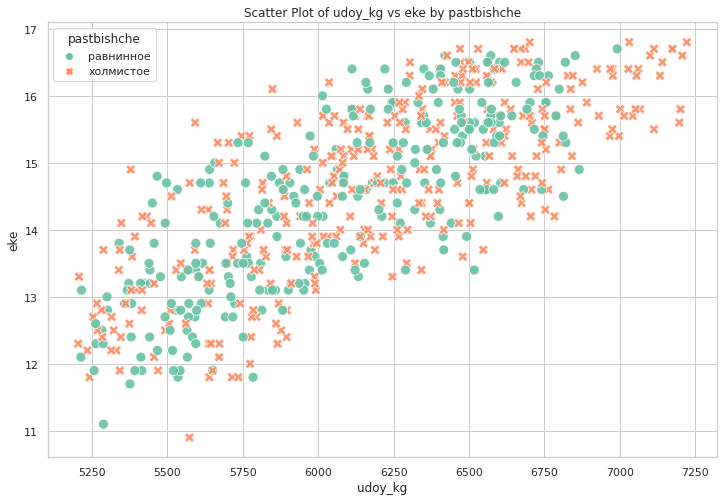

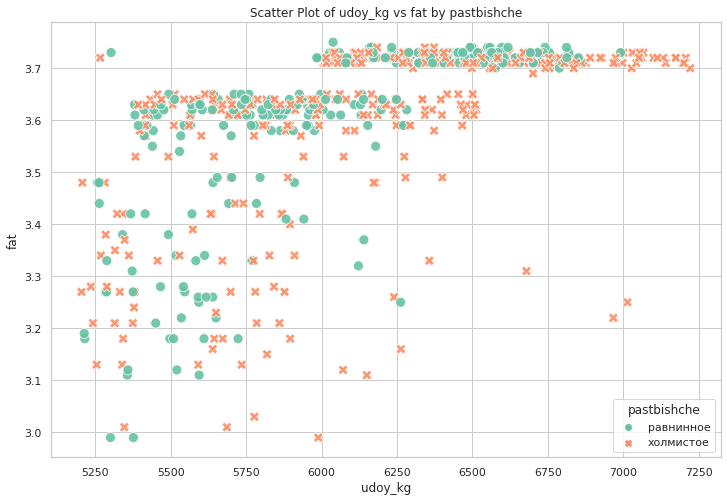

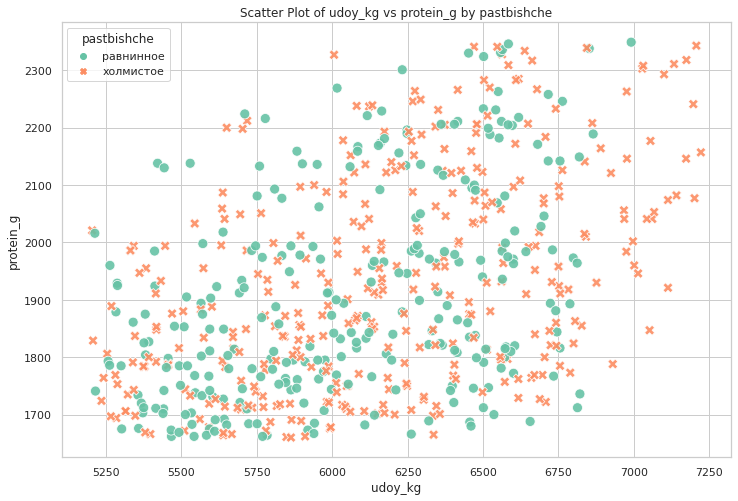

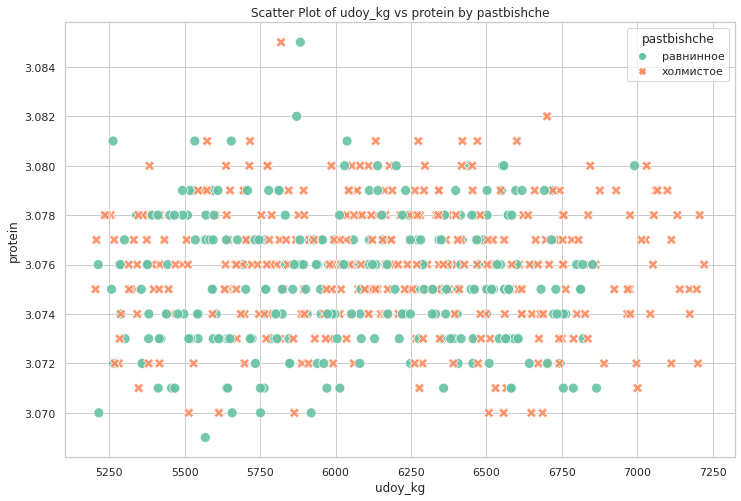

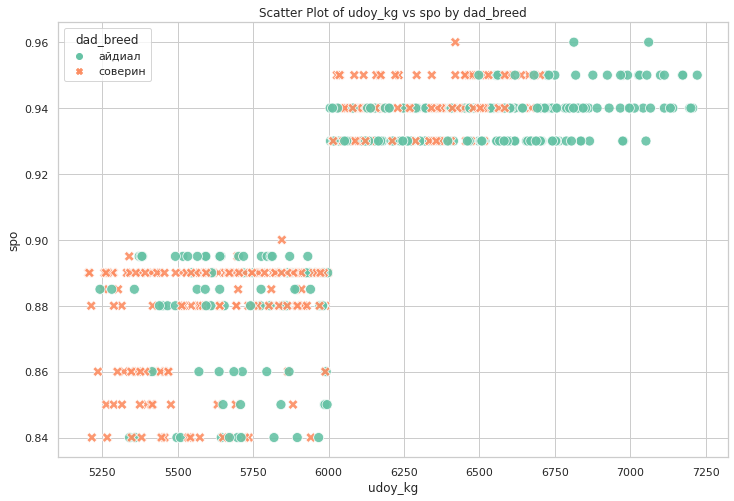

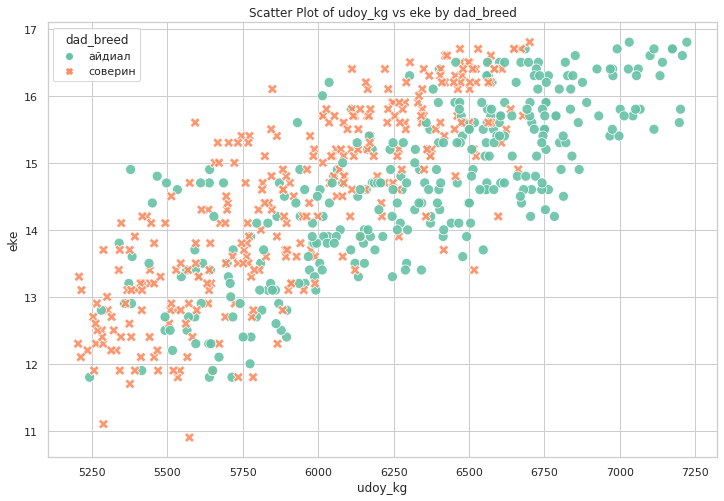

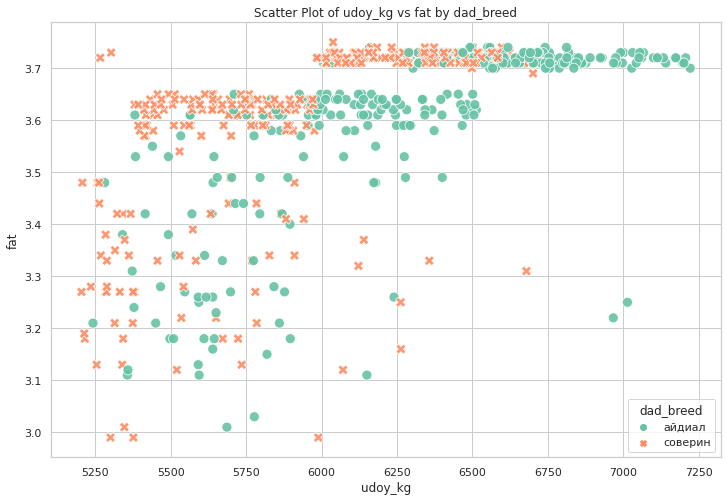

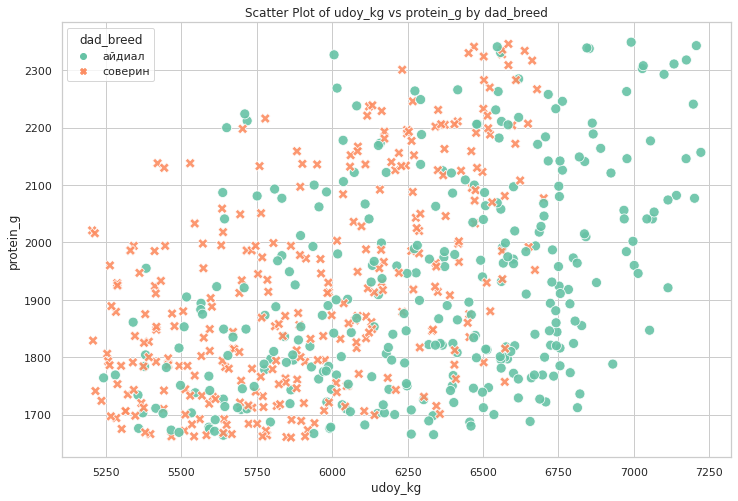

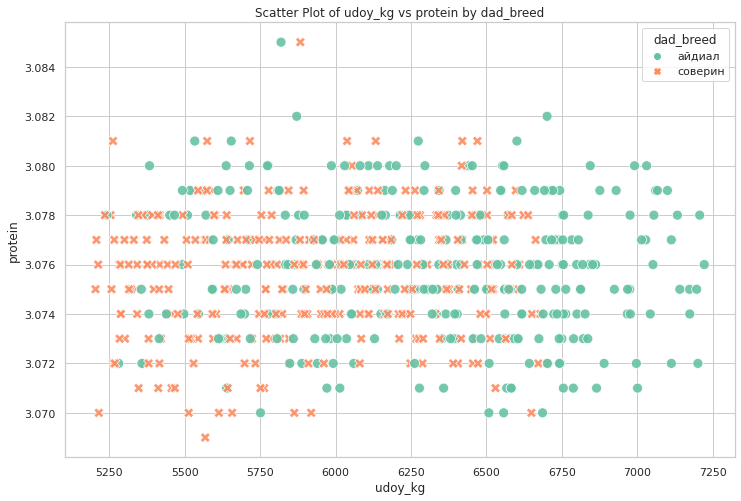

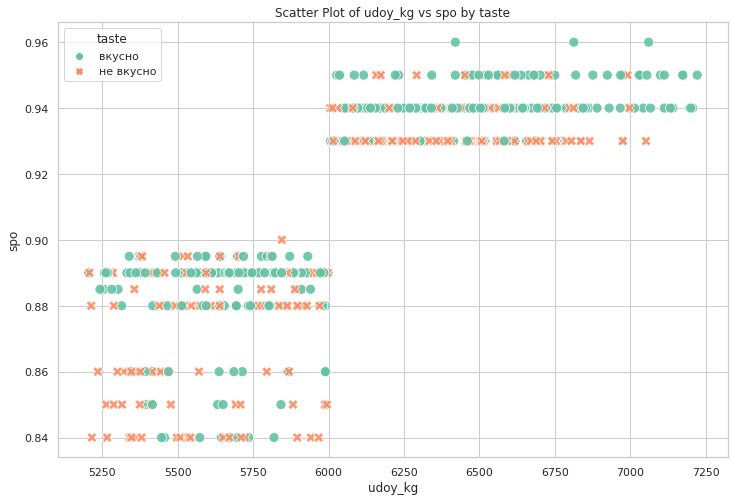

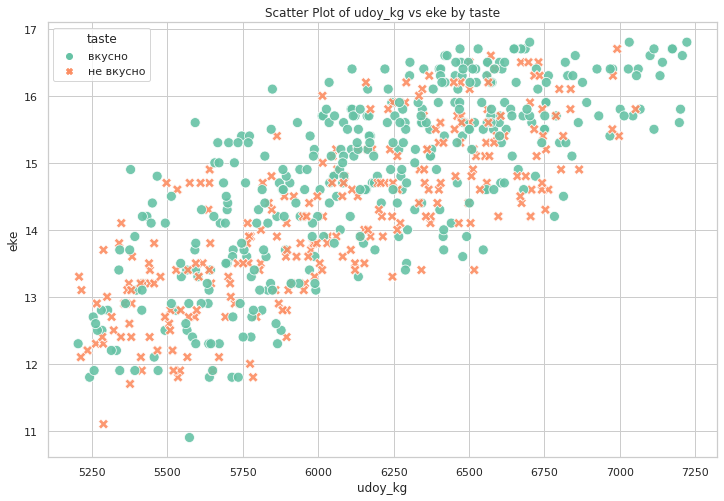

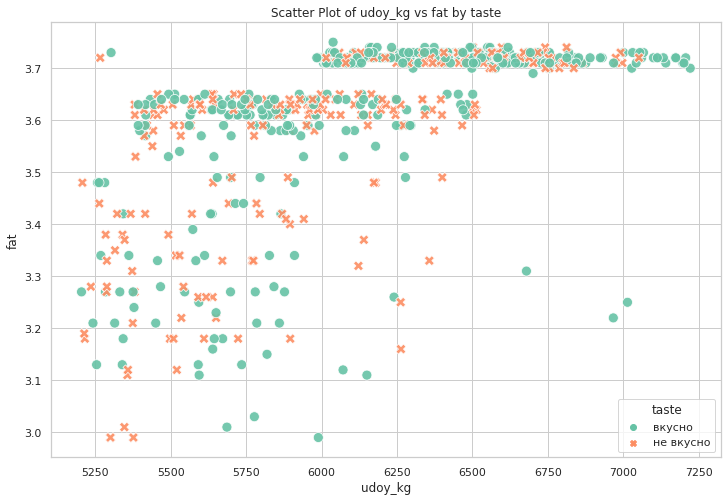

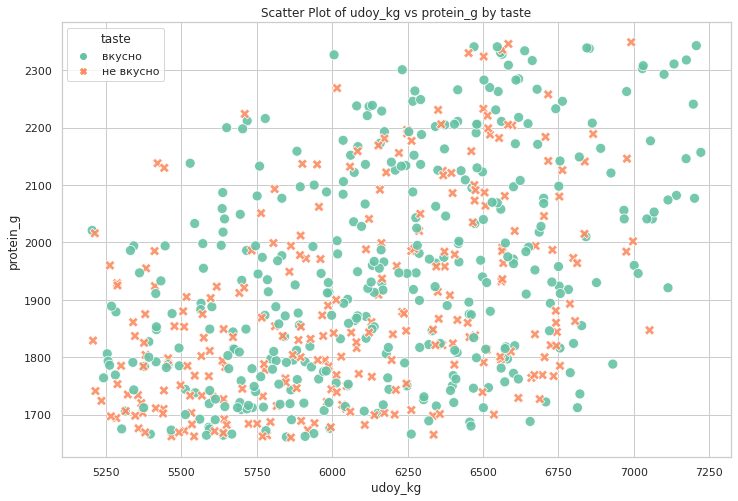

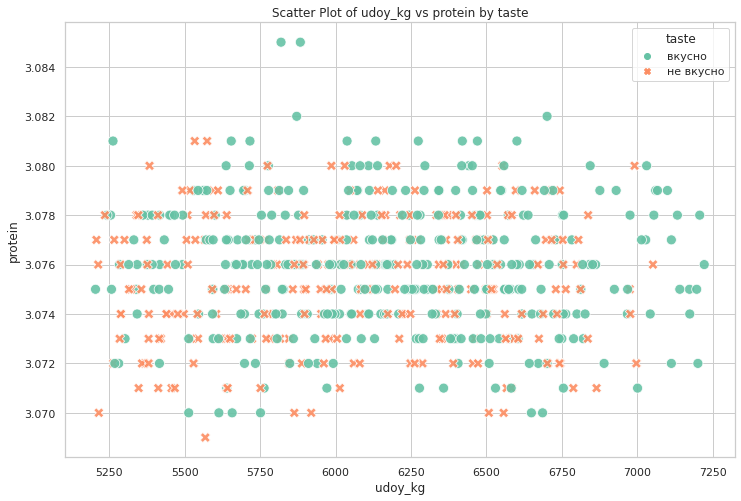

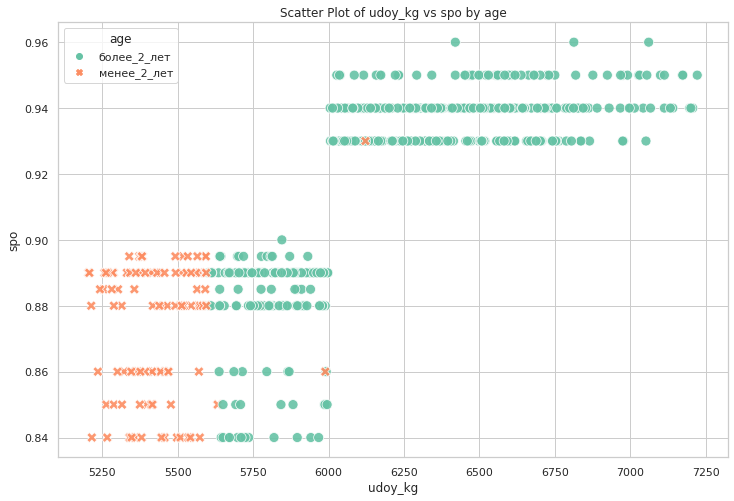

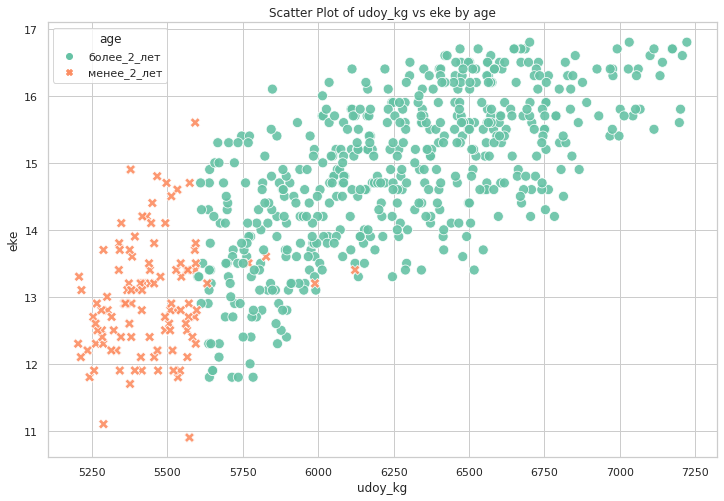

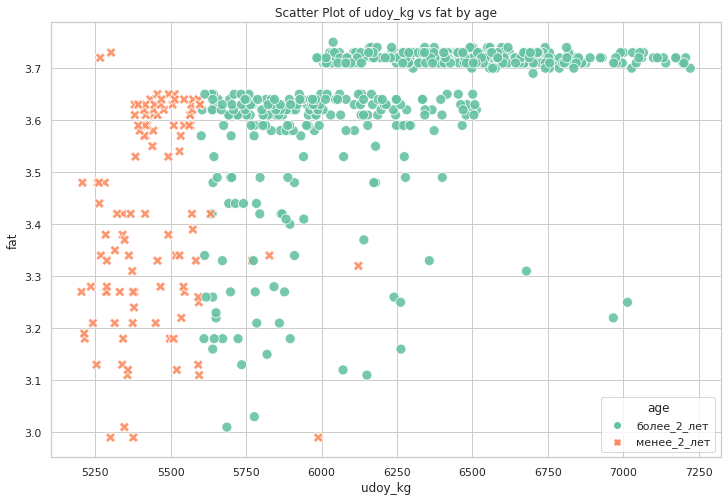

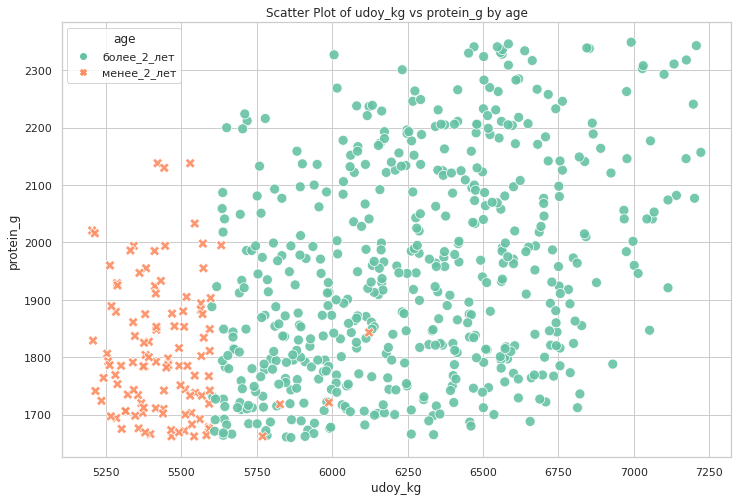

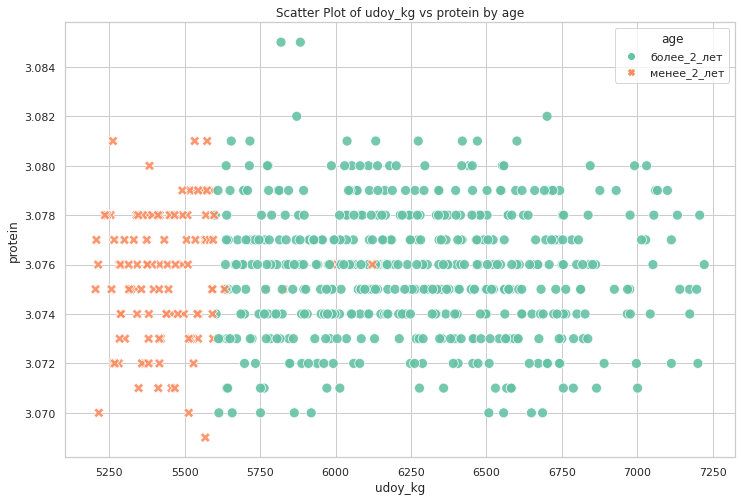

In [39]:
# Список количественных и категориальных признаков
quantitative_features = ['spo','eke', 'fat', 'protein_g', 'protein']
categorical_features = ['poroda', 'pastbishche', 'dad_breed', 'taste', 'age']



# Создание диаграмм рассеяния для всех категориальных признаков
for categorical_feature in categorical_features:
    for feature in quantitative_features:
        plt.figure(figsize=(12, 8))
        scatter_plot = sns.scatterplot(
            data=ferma_main, 
            x='udoy_kg', 
            y=feature, 
            hue=categorical_feature,  # Категориальный признак
            palette='Set2',  
            style=categorical_feature,  # Разные маркеры для разных категорий
            alpha=0.9,  
            s=100,  
        )
        plt.title(f'Scatter Plot of udoy_kg vs {feature} by {categorical_feature}')
        plt.xlabel('udoy_kg')
        plt.ylabel(feature)
        plt.legend(title=categorical_feature)
        plt.grid(True)
        plt.show()


### Взаимосвязь между целевым признаком (`udoy_kg`) и входными признаками:

### Тип взаимосвязи:

- **Линейные связи**: отсутствуют
 
- **Нелинейные связи**:
  Исходя из предоставленных данных, СПО, Жирность, Сырой ротеин имеют нелинейную зависимость с удоем. Зависимость между ЭКЕ в квадрате и удоем немного лучше описывается прямой (чем между эке и удоем), значит связь больше похожа на квадратичную.
- Содержание белка не связано с уровнем удоя и не оказывает влияния на его изменение. 

### Необходимость введения дополнительных признаков отсутствует
- Чтобы устранить нелинейность, преобразуем СПО в категориальный бинарный признак, использовав 0,92 как границу.
- ЭКЕ и Удой также связаны нелинейно. Нелинейность между ними можно исключить, если ввести новый признак ЭКЕ в квадрате.

### Мультиколлинеарность:

- Мультиколлинеарность между признаками умеренная, без явных признаков сильной мультиколлинеарности. Наиболее высокая корреляция наблюдается между СПО и ЭКЕ.

### Рекомендации для построения модели:

- Не следует использовать: Белок, Жирность, Вкус молока, так как они имеют слабую и нелинейную зависимость с удоем.



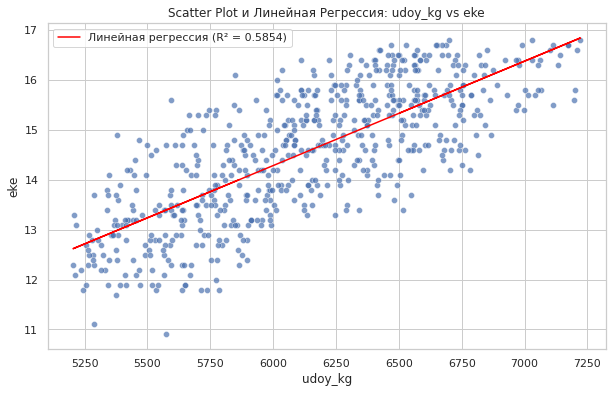

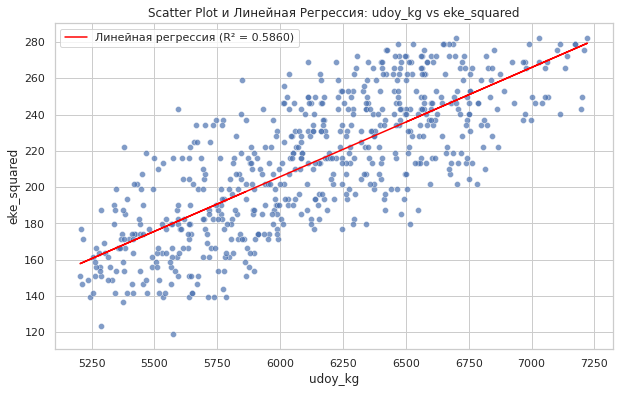

In [40]:
ferma_main['eke_squared'] = ferma_main['eke'] ** 2
# Построение scatter plot для udoy_kg и признака
def plot_scatter_with_regression(df, x_col, y_col):
    plt.figure(figsize=(10, 6))
    sns.scatterplot(data=df, x=x_col, y=y_col, alpha=0.7)
    
    # Линейная регрессия
    model = LinearRegression()
    model.fit(df[[x_col]], df[y_col])
    predictions = model.predict(df[[x_col]])
    r2 = r2_score(df[y_col], predictions)
    
    # Построение линии регрессии
    plt.plot(df[[x_col]], predictions, color='red', label=f'Линейная регрессия (R² = {r2:.4f})')
    plt.xlabel(x_col)
    plt.ylabel(y_col)
    plt.title(f'Scatter Plot и Линейная Регрессия: {x_col} vs {y_col}')
    plt.legend()
    plt.grid(True)
    plt.show()
    
# Построение графиков
plot_scatter_with_regression(ferma_main, 'udoy_kg', 'eke')
plot_scatter_with_regression(ferma_main, 'udoy_kg', 'eke_squared')

In [41]:

features = ['eke', 'spo', 'fat', 'protein_g']
X = ferma_main[features]

# Добавление константы
X = sm.add_constant(X)

# Расчет VIF
vif_data = pd.DataFrame()
vif_data["feature"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

vif_data

feature          VIF
0      const  1141.084842
1        eke     2.550942
2        spo     2.627586
3        fat     1.860984
4  protein_g     1.268546

Поскольку все значения VIF ниже 5, мультиколлинеарность не представляет значительной проблемы в нашем наборе данных. 

## Обучение модели линейной регрессии

## Модель линейной регрессии №1

In [42]:
ferma_main_lr = ferma_main[ferma_main.columns]

In [43]:
ferma_main_lr.describe(include = 'object')

poroda pastbishche dad_breed   taste          age
count              628         628       628     628          628
unique               2           2         2       2            2
top     вис бик айдиал   холмистое    айдиал  вкусно  более_2_лет
freq               372         350       317     370          518

In [44]:
ferma_main_lr.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 628 entries, 0 to 628
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           628 non-null    int64  
 1   udoy_kg      628 non-null    int64  
 2   eke          628 non-null    float64
 3   protein_g    628 non-null    int64  
 4   spo          628 non-null    float64
 5   poroda       628 non-null    object 
 6   pastbishche  628 non-null    object 
 7   dad_breed    628 non-null    object 
 8   fat          628 non-null    float64
 9   protein      628 non-null    float64
 10  taste        628 non-null    object 
 11  age          628 non-null    object 
 12  eke_squared  628 non-null    float64
dtypes: float64(5), int64(3), object(5)
memory usage: 68.7+ KB


In [45]:
RANDOM_STATE = 42

X = ferma_main_lr.drop('udoy_kg', axis=1)
y = ferma_main_lr['udoy_kg']

X_train, X_test, y_train, y_test = train_test_split(
    X, 
    y, 
    random_state=RANDOM_STATE)

X_train.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 471 entries, 508 to 103
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           471 non-null    int64  
 1   eke          471 non-null    float64
 2   protein_g    471 non-null    int64  
 3   spo          471 non-null    float64
 4   poroda       471 non-null    object 
 5   pastbishche  471 non-null    object 
 6   dad_breed    471 non-null    object 
 7   fat          471 non-null    float64
 8   protein      471 non-null    float64
 9   taste        471 non-null    object 
 10  age          471 non-null    object 
 11  eke_squared  471 non-null    float64
dtypes: float64(5), int64(2), object(5)
memory usage: 47.8+ KB


In [46]:
# Определяем имена категориальных и числовых признаков
cat_col_names = ['poroda', 'pastbishche', 'dad_breed', 'age']
num_col_names = ['eke', 'spo', 'protein_g']


# Создаем экземпляр OneHotEncoder для преобразования категориальных переменных
encoder = OneHotEncoder(drop='first', sparse_output=False)
X_train_ohe = encoder.fit_transform(X_train[cat_col_names])
X_test_ohe = encoder.transform(X_test[cat_col_names])

encoder_col_names = encoder.get_feature_names_out()
encoder_col_names

array(['poroda_рефлешнсоверинг', 'pastbishche_холмистое',
       'dad_breed_соверин', 'age_менее_2_лет'], dtype=object)

In [47]:
# Применяем StandardScaler для нормализации числовых признаков
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train[num_col_names])
X_test_scaled = scaler.transform(X_test[num_col_names])

In [48]:
# Преобразуем результат OneHotEncoding в DataFrame с правильными именами столбцов
X_train_ohe = pd.DataFrame(X_train_ohe, columns=encoder_col_names)
X_test_ohe = pd.DataFrame(X_test_ohe, columns=encoder_col_names)

# Преобразуем нормализованные числовые признаки в DataFrame
X_train_scaled = pd.DataFrame(X_train_scaled, columns=num_col_names)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=num_col_names)

X_train = pd.concat([X_train_ohe, X_train_scaled], axis=1)
X_test = pd.concat([X_test_ohe, X_test_scaled], axis=1)

In [49]:
# Создаем и обучаем модель линейной регрессии
model_lr  = LinearRegression()
model_lr.fit(X_train, y_train)

# Делаем предсказания на тестовых данных
predictions1 = model_lr.predict(X_test)

In [50]:

# Вычисляем коэффициент детерминации R² для оценки качества модели
r2 = r2_score(y_test, predictions1)  
r2

0.7844078173416966

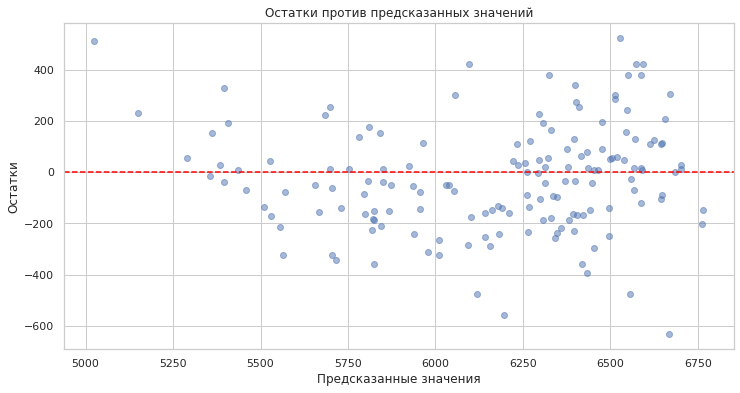

In [51]:
# Остатки
residuals = y_test - predictions1

# График остатков против предсказанных значений
plt.figure(figsize=(12, 6))
plt.scatter(predictions1, residuals, alpha=0.5)
plt.axhline(0, color='red', linestyle='--')
plt.xlabel('Предсказанные значения')
plt.ylabel('Остатки')
plt.title('Остатки против предсказанных значений')
plt.show()

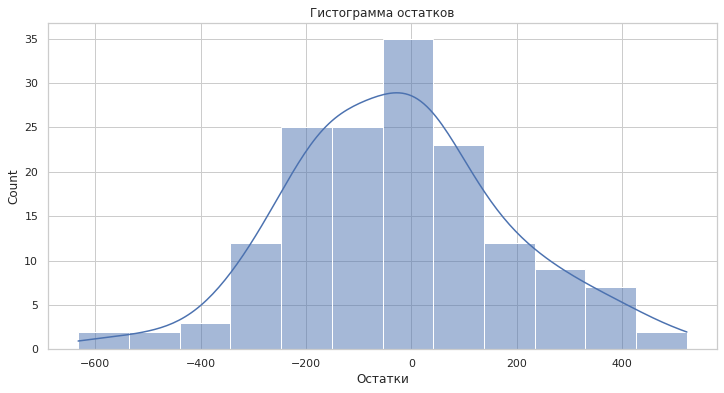

In [52]:
# Гистограмма остатков
plt.figure(figsize=(12, 6))
sns.histplot(residuals, kde=True)
plt.xlabel('Остатки')
plt.title('Гистограмма остатков')
plt.show()

### Выводы

**Значение R² модели:**
   - Значение R² составляет **0.78**, что указывает на то, что модель объясняет около **78%** вариации в целевой переменной. Это довольно высокий показатель, свидетельствующий о хорошей предсказательной способности модели.

**Выводы из анализа остатков:**
   - Остатки модели колеблются вокруг нуля, что является положительным знаком, поскольку это указывает на то, что модель адекватно оценивает тестовые значения.

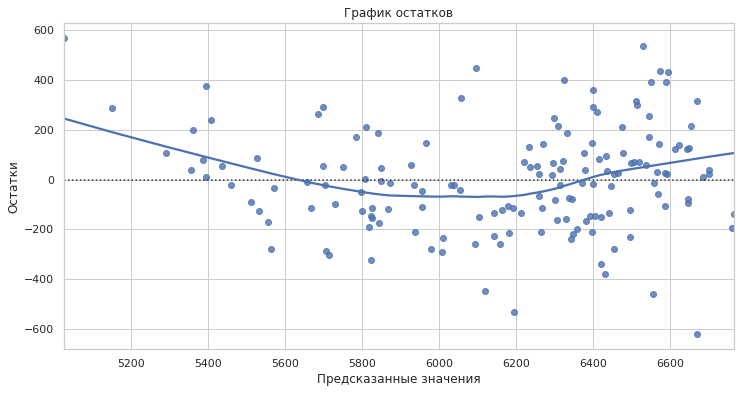

In [53]:
plt.figure(figsize=(12, 6))
sns.residplot(x=predictions1, y=residuals, lowess=True)
plt.xlabel('Предсказанные значения')
plt.ylabel('Остатки')
plt.title('График остатков')
plt.show()

## Модель линейной регрессии №2

In [54]:
ferma_main_lr2 = ferma_main[ferma_main.columns]
ferma_main_lr2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 628 entries, 0 to 628
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           628 non-null    int64  
 1   udoy_kg      628 non-null    int64  
 2   eke          628 non-null    float64
 3   protein_g    628 non-null    int64  
 4   spo          628 non-null    float64
 5   poroda       628 non-null    object 
 6   pastbishche  628 non-null    object 
 7   dad_breed    628 non-null    object 
 8   fat          628 non-null    float64
 9   protein      628 non-null    float64
 10  taste        628 non-null    object 
 11  age          628 non-null    object 
 12  eke_squared  628 non-null    float64
dtypes: float64(5), int64(3), object(5)
memory usage: 68.7+ KB


In [55]:
ferma_main_lr2.describe(include = 'object')

poroda pastbishche dad_breed   taste          age
count              628         628       628     628          628
unique               2           2         2       2            2
top     вис бик айдиал   холмистое    айдиал  вкусно  более_2_лет
freq               372         350       317     370          518

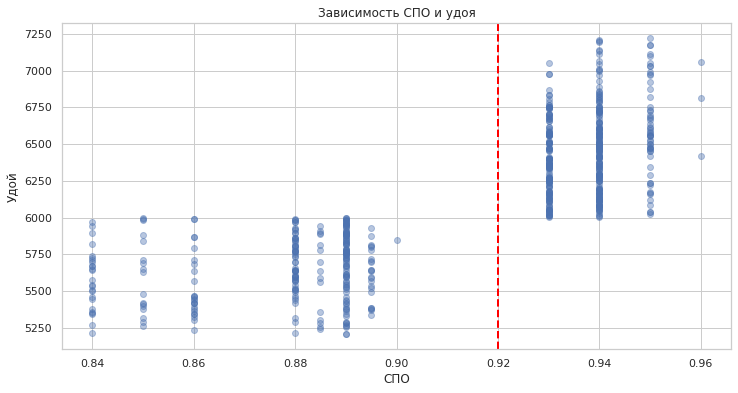

In [56]:
# Визуализация зависимости СПО и удоя
plt.figure(figsize=(12, 6))
plt.scatter(ferma_main_lr2['spo'],ferma_main_lr2['udoy_kg'],  alpha=0.4)
plt.xlabel('СПО')
plt.ylabel('Удой')
plt.title('Зависимость СПО и удоя')
# Добавление красной вертикальной линии на x=0.92
plt.axvline(x=0.92, color='red', linestyle='--', linewidth=2)

plt.show()


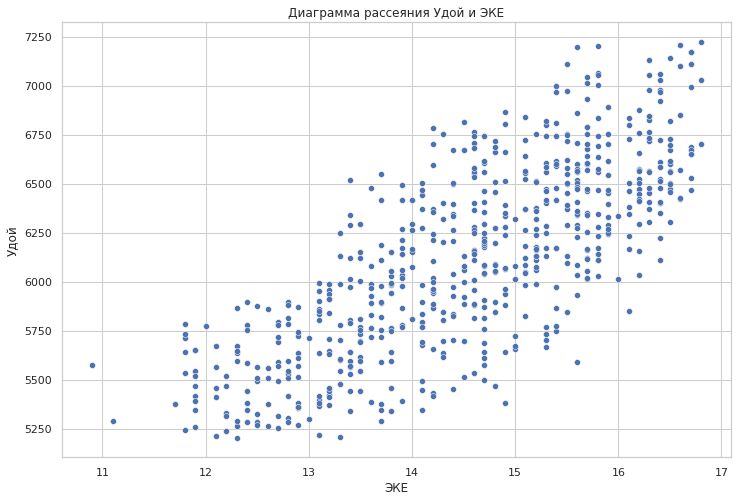

In [57]:
plt.figure(figsize=(12, 8))
sns.scatterplot(data=ferma_main_lr2, x='eke', y='udoy_kg')
plt.xlabel('ЭКЕ')
plt.ylabel('Удой')
plt.title('Диаграмма рассеяния Удой и ЭКЕ')
plt.show()


### Преобразование СПО и добавление квадрата ЕКЕ

- Cоздадим новый бинарный признак `spo_binary`, который принимает значение 1, если СПО больше заданной границы 0.92, и 0 в противном случае.
- Добавим новый признак eke_squared, который является квадратом существующего признака ЭКЕ.

In [58]:
boundary = 0.92
ferma_main_lr2['spo_binary'] = (ferma_main_lr2['spo'] > boundary).astype(int)

# Добавление квадратного признака для ЭКЕ
ferma_main_lr2['eke_squared'] = ferma_main_lr2['eke'] ** 2


ferma_main_lr2.head()



id  udoy_kg   eke  protein_g    spo           poroda pastbishche dad_breed  \
0   1     5863  14.2       1743  0.890   вис бик айдиал   равнинное    айдиал   
1   2     5529  12.8       2138  0.890   вис бик айдиал   равнинное   соверин   
2   3     5810  14.0       1854  0.885  рефлешнсоверинг   холмистое   соверин   
3   4     5895  12.4       2012  0.885  рефлешнсоверинг   холмистое    айдиал   
4   5     5302  12.8       1675  0.885   вис бик айдиал   равнинное   соверин   

    fat  protein      taste          age  eke_squared  spo_binary  
0  3.58    3.076     вкусно  более_2_лет       201.64           0  
1  3.54    3.079     вкусно  менее_2_лет       163.84           0  
2  3.59    3.074  не вкусно  более_2_лет       196.00           0  
3  3.40    3.075  не вкусно  более_2_лет       153.76           0  
4  3.73    3.073     вкусно  менее_2_лет       163.84           0

In [59]:
# Определение признаков и целевой переменной
X = ferma_main_lr2.drop('udoy_kg', axis=1)
y = ferma_main_lr2['udoy_kg']

# Разделение на обучающую и тестовую выборки

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=RANDOM_STATE)

# Определение категориальных и числовых признаков
cat_col_names = ['poroda', 'pastbishche', 'dad_breed', 'age','spo_binary' ]
num_col_names = ['eke_squared', 'protein_g']


In [60]:
# Преобразование категориальных признаков с помощью OneHotEncoder
encoder = OneHotEncoder(drop='first', sparse_output=False)
X_train_ohe = encoder.fit_transform(X_train[cat_col_names])
X_test_ohe = encoder.transform(X_test[cat_col_names])

encoder_col_names = encoder.get_feature_names_out()
encoder_col_names


array(['poroda_рефлешнсоверинг', 'pastbishche_холмистое',
       'dad_breed_соверин', 'age_менее_2_лет', 'spo_binary_1'],
      dtype=object)

In [61]:

X_train_ohe = pd.DataFrame(X_train_ohe, columns=encoder_col_names)
X_test_ohe = pd.DataFrame(X_test_ohe, columns=encoder_col_names)

# Нормализация числовых признаков
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train[num_col_names])
X_test_scaled = scaler.transform(X_test[num_col_names])

X_train_scaled = pd.DataFrame(X_train_scaled, columns=num_col_names)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=num_col_names)



In [62]:
# Объединение преобразованных данных
X_train = pd.concat([X_train_ohe, X_train_scaled], axis=1)
X_test = pd.concat([X_test_ohe, X_test_scaled], axis=1)

# Обучение модели линейной регрессии
model_lr = LinearRegression()
model_lr.fit(X_train, y_train)

# Предсказания и оценка модели
predictions2 = model_lr.predict(X_test)
r2 = r2_score(y_test, predictions2)
r2


0.8180879926867501

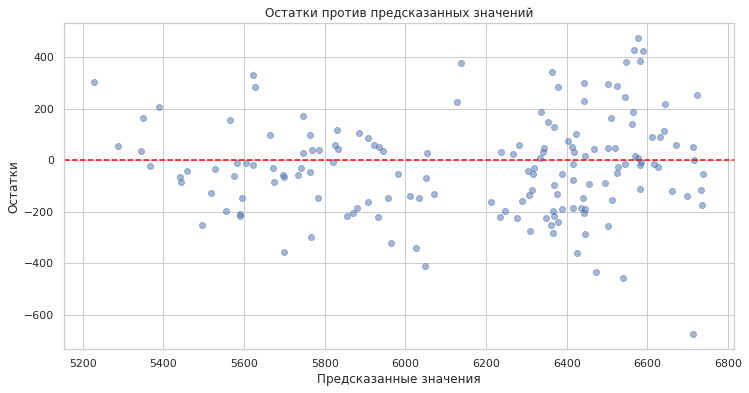

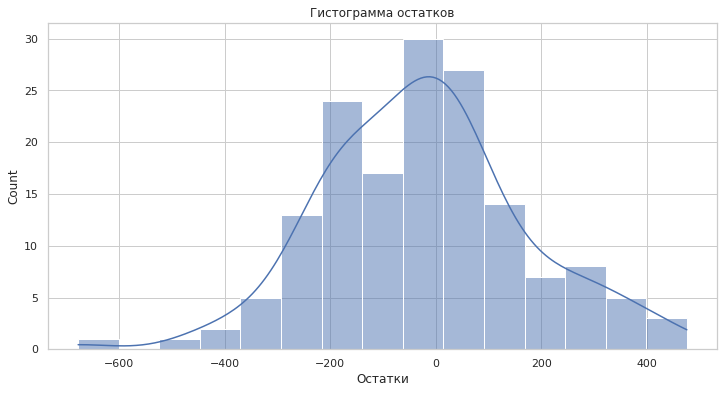

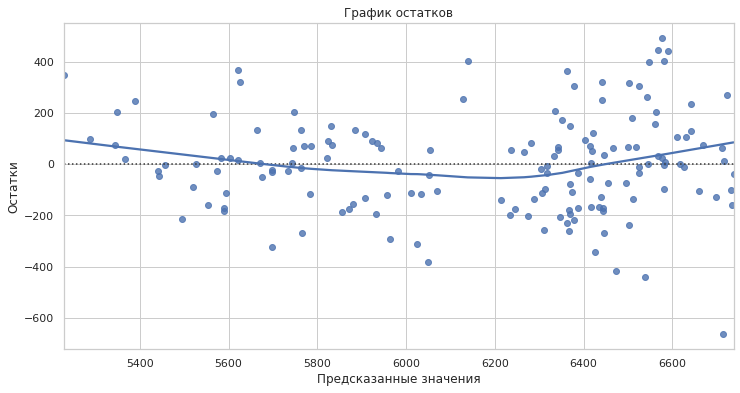

In [63]:

# Анализ остатков
residuals = y_test - predictions2

# График остатков против предсказанных значений
plt.figure(figsize=(12, 6))
plt.scatter(predictions2, residuals, alpha=0.5)
plt.axhline(0, color='red', linestyle='--')
plt.xlabel('Предсказанные значения')
plt.ylabel('Остатки')
plt.title('Остатки против предсказанных значений')
plt.show()

# Гистограмма остатков
plt.figure(figsize=(12, 6))
sns.histplot(residuals, kde=True)
plt.xlabel('Остатки')
plt.title('Гистограмма остатков')
plt.show()

# Построение графика остатков с использованием sns.residplot
plt.figure(figsize=(12, 6))
sns.residplot(x=predictions2, y=residuals, lowess=True)
plt.xlabel('Предсказанные значения')
plt.ylabel('Остатки')
plt.title('График остатков')
plt.show()

### Выводы

**Значение R² модели:**
   - Модель объясняет около 81% вариации в удое, что лучше, чем в первой модели. 

**Выводы из анализа остатков:**
   - Остатки также колеблются вокруг нуля, что подтверждает хорошую адекватность модели.

## Модель линейной регрессии №3

In [64]:
# Объединение данных по ключу
ferma_main_combined = pd.merge(ferma_main, ferma_dad[['id', 'dad_name']], on='id')
ferma_main_combined.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 628 entries, 0 to 627
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           628 non-null    int64  
 1   udoy_kg      628 non-null    int64  
 2   eke          628 non-null    float64
 3   protein_g    628 non-null    int64  
 4   spo          628 non-null    float64
 5   poroda       628 non-null    object 
 6   pastbishche  628 non-null    object 
 7   dad_breed    628 non-null    object 
 8   fat          628 non-null    float64
 9   protein      628 non-null    float64
 10  taste        628 non-null    object 
 11  age          628 non-null    object 
 12  eke_squared  628 non-null    float64
 13  dad_name     628 non-null    object 
dtypes: float64(5), int64(3), object(6)
memory usage: 73.6+ KB


In [65]:
# Добавление нового бинарного признака для СПО
boundary = 0.92
ferma_main_combined['spo_binary'] = (ferma_main_combined['spo'] > boundary).astype(int)

# Добавление нового признака - квадрат ЭКЕ
ferma_main_combined['eke_squared'] = ferma_main_combined['eke'] ** 2

In [66]:
X = ferma_main_combined.drop(['udoy_kg', 'id'], axis=1)
y = ferma_main_combined['udoy_kg']
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=RANDOM_STATE)

In [67]:
# Определите категориальные и числовые признаки
cat_col_names = ['poroda', 'pastbishche', 'dad_breed', 'age', 'dad_name', 'spo_binary']
num_col_names = ['protein_g', 'eke_squared']


In [68]:
encoder = OneHotEncoder(drop='first', sparse_output=False)
X_train_ohe = encoder.fit_transform(X_train[cat_col_names])
X_test_ohe = encoder.transform(X_test[cat_col_names])

encoder_col_names = encoder.get_feature_names_out()
encoder_col_names

array(['poroda_рефлешнсоверинг', 'pastbishche_холмистое',
       'dad_breed_соверин', 'age_менее_2_лет', 'dad_name_буйный',
       'dad_name_геркулес', 'dad_name_соловчик', 'spo_binary_1'],
      dtype=object)

In [69]:
X_train_ohe = pd.DataFrame(X_train_ohe, columns=encoder_col_names)
X_test_ohe = pd.DataFrame(X_test_ohe, columns=encoder_col_names)

# Нормализация числовых признаков
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train[num_col_names])
X_test_scaled = scaler.transform(X_test[num_col_names])

X_train_scaled = pd.DataFrame(X_train_scaled, columns=num_col_names)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=num_col_names)
# Объединение преобразованных данных
X_train_prepared = pd.concat([X_train_ohe, X_train_scaled], axis=1)
X_test_prepared = pd.concat([X_test_ohe, X_test_scaled], axis=1)


In [70]:
# Создание и обучение модели
model_lr3 = LinearRegression()
model_lr3.fit(X_train_prepared, y_train)
# Предсказания
predictions3 = model_lr3.predict(X_test_prepared)

# Оценка качества
r2 = r2_score(y_test, predictions3)
r2

0.8247542745210406

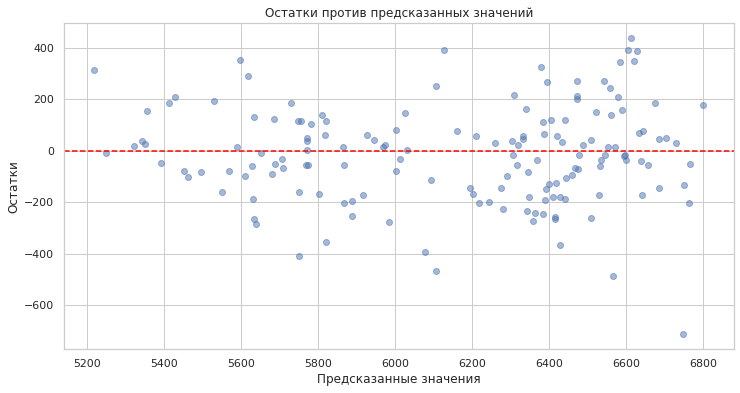

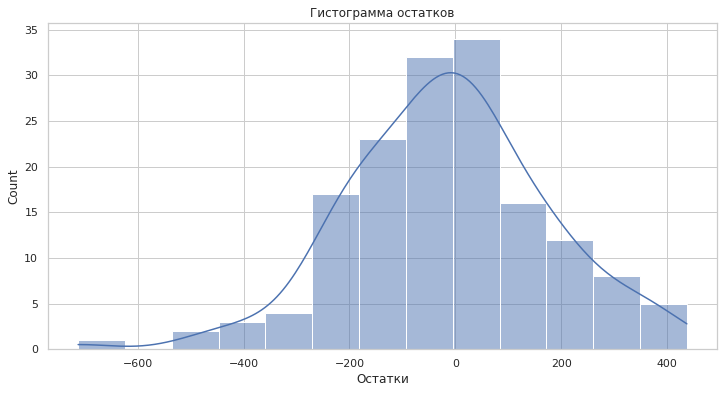

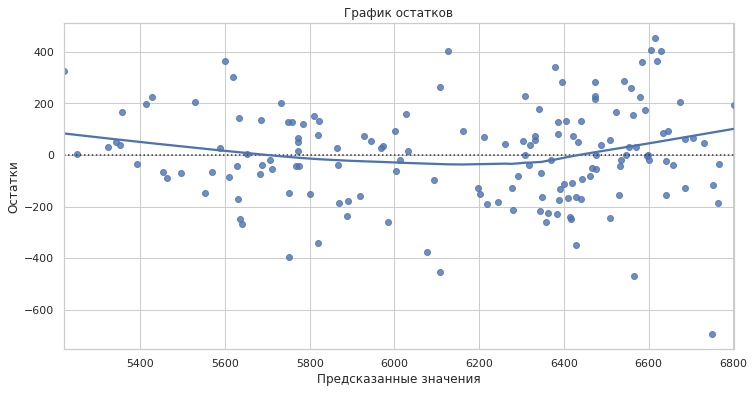

In [71]:
# Остатки
residuals = y_test - predictions3

# График остатков
plt.figure(figsize=(12, 6))
plt.scatter(predictions3, residuals, alpha=0.5)
plt.axhline(0, color='red', linestyle='--')
plt.xlabel('Предсказанные значения')
plt.ylabel('Остатки')
plt.title('Остатки против предсказанных значений')
plt.show()

# Гистограмма остатков
plt.figure(figsize=(12, 6))
sns.histplot(residuals, kde=True)
plt.xlabel('Остатки')
plt.title('Гистограмма остатков')
plt.show()

# Построение графика остатков с использованием sns.residplot
plt.figure(figsize=(12, 6))
sns.residplot(x=predictions3, y=residuals, lowess=True)
plt.xlabel('Предсказанные значения')
plt.ylabel('Остатки')
plt.title('График остатков')
plt.show()

### Выводы

**Значение R² модели:**
  - Модель объясняет около 82% вариации в удое, что лучше, чем в первой и второй модели. 

**Выводы из анализа остатков:**
   - Остатки также колеблются вокруг нуля, что подтверждает хорошую адекватность модели, распределение остатков стало более равномерное.

In [72]:
#  Расчет метрик для каждой модели
def calculate_metrics(y_true, y_pred):
    mse = mean_squared_error(y_true, y_pred)
    mae = mean_absolute_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    return mse, mae, rmse


mse_1, mae_1, rmse_1 = calculate_metrics(y_test, predictions1)
mse_2, mae_2, rmse_2 = calculate_metrics(y_test, predictions2)
mse_3, mae_3, rmse_3 = calculate_metrics(y_test, predictions3)

In [73]:
# Оформление вывода
print("Оценка качества моделей:")
print(f"{'Модель':<10} {'MSE':<10} {'MAE':<10} {'RMSE':<10}")
print("-" * 40)
print(f"Модель 1: {mse_1:<10.2f} {mae_1:<10.2f} {rmse_1:<10.2f}")
print(f"Модель 2: {mse_2:<10.2f} {mae_2:<10.2f} {rmse_2:<10.2f}")
print(f"Модель 3: {mse_3:<10.2f} {mae_3:<10.2f} {rmse_3:<10.2f}")



Оценка качества моделей:
Модель     MSE        MAE        RMSE      
----------------------------------------
Модель 1: 43887.02   164.24     209.49    
Модель 2: 37030.91   149.04     192.43    
Модель 3: 35673.89   146.16     188.88    


In [74]:
# Определение лучшей модели
metrics = {
    "Модель 1": (mse_1, mae_1, rmse_1),
    "Модель 2": (mse_2, mae_2, rmse_2),
    "Модель 3": (mse_3, mae_3, rmse_3),
}

# Выбор лучшей модели на основе минимальных значений метрик
best_model = min(metrics, key=lambda k: (metrics[k][0], metrics[k][1], metrics[k][2]))
print(f"\nЛучшая модель: {best_model}")




Лучшая модель: Модель 3


In [75]:
# Вычисляем ошибки
errors = y_test - predictions3

# Определяем уровень значимости для 95% доверительного интервала
alpha = 0.05

# Находим квантили ошибок для заданного уровня значимости
lower_quantile = np.percentile(errors, 100 * (alpha / 2))
upper_quantile = np.percentile(errors, 100 * (1 - alpha / 2))

# Рассчитываем среднее значение прогнозов
mean_prediction = np.mean(predictions3)

# Вычисляем доверительный интервал для среднего предсказанного значения
lower_bound = mean_prediction + lower_quantile
upper_bound = mean_prediction + upper_quantile

# Выводим результаты
print(f"Среднее предсказанное значение: {mean_prediction:.4f}")
print(f"95% доверительный интервал для среднего предсказанного значения:")
print(f"Нижний предел: {lower_bound:.4f}")
print(f"Верхний предел: {upper_bound:.4f}")

Среднее предсказанное значение: 6156.8576
95% доверительный интервал для среднего предсказанного значения:
Нижний предел: 5763.7579
Верхний предел: 6512.7947


## Прогноз удоя коров

In [76]:
cow_buy_new = cow_buy[cow_buy.columns]
cow_buy_new.head()


poroda pastbishche dad_breed  dad_name   fat  protein          age
0   вис бик айдиал   холмистое    айдиал  геркулес  3.58    3.076  более_2_лет
1   вис бик айдиал   равнинное   соверин    буйный  3.54    3.081  менее_2_лет
2  рефлешнсоверинг   равнинное   соверин     барин  3.59    3.074  более_2_лет
3  рефлешнсоверинг   холмистое    айдиал    буйный  3.40    3.061  более_2_лет
4  рефлешнсоверинг   равнинное    айдиал    буйный  3.64    3.074  более_2_лет

In [77]:
# Найдем средние значения для недостающих признаков
mean_values = ferma_main[['eke', 'protein_g', 'spo']].mean()

# Увеличим средние значения на 5%
mean_values *= 1.05
mean_values

eke            15.276162
protein_g    2019.947532
spo             0.958744
dtype: float64

In [78]:
# Добавляем столбцы с пустыми значениями (NaN)
cow_buy_new['eke'] = np.nan
cow_buy_new['protein_g'] = np.nan
cow_buy_new['spo'] = np.nan

# Заполним недостающие признаки в cow_buy средними значениями
cow_buy_new['eke'].fillna(mean_values['eke'], inplace=True)
cow_buy_new['protein_g'].fillna(mean_values['protein_g'], inplace=True)
cow_buy_new['spo'].fillna(mean_values['spo'], inplace=True)
cow_buy_new.head()

poroda pastbishche dad_breed  dad_name   fat  protein  \
0   вис бик айдиал   холмистое    айдиал  геркулес  3.58    3.076   
1   вис бик айдиал   равнинное   соверин    буйный  3.54    3.081   
2  рефлешнсоверинг   равнинное   соверин     барин  3.59    3.074   
3  рефлешнсоверинг   холмистое    айдиал    буйный  3.40    3.061   
4  рефлешнсоверинг   равнинное    айдиал    буйный  3.64    3.074   

           age        eke    protein_g       spo  
0  более_2_лет  15.276162  2019.947532  0.958744  
1  менее_2_лет  15.276162  2019.947532  0.958744  
2  более_2_лет  15.276162  2019.947532  0.958744  
3  более_2_лет  15.276162  2019.947532  0.958744  
4  более_2_лет  15.276162  2019.947532  0.958744

In [79]:
# Добавление нового бинарного признака для СПО
boundary = 0.92
cow_buy_new['spo_binary'] = (cow_buy_new['spo'] > boundary).astype(int)

# Добавление нового признака - квадрат ЭКЕ
cow_buy_new['eke_squared'] = cow_buy_new['eke'] ** 2
cow_buy_new.head()

poroda pastbishche dad_breed  dad_name   fat  protein  \
0   вис бик айдиал   холмистое    айдиал  геркулес  3.58    3.076   
1   вис бик айдиал   равнинное   соверин    буйный  3.54    3.081   
2  рефлешнсоверинг   равнинное   соверин     барин  3.59    3.074   
3  рефлешнсоверинг   холмистое    айдиал    буйный  3.40    3.061   
4  рефлешнсоверинг   равнинное    айдиал    буйный  3.64    3.074   

           age        eke    protein_g       spo  spo_binary  eke_squared  
0  более_2_лет  15.276162  2019.947532  0.958744           1   233.361138  
1  менее_2_лет  15.276162  2019.947532  0.958744           1   233.361138  
2  более_2_лет  15.276162  2019.947532  0.958744           1   233.361138  
3  более_2_лет  15.276162  2019.947532  0.958744           1   233.361138  
4  более_2_лет  15.276162  2019.947532  0.958744           1   233.361138

In [80]:

cow_buy_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   poroda       20 non-null     object 
 1   pastbishche  20 non-null     object 
 2   dad_breed    20 non-null     object 
 3   dad_name     20 non-null     object 
 4   fat          20 non-null     float64
 5   protein      20 non-null     float64
 6   age          20 non-null     object 
 7   eke          20 non-null     float64
 8   protein_g    20 non-null     float64
 9   spo          20 non-null     float64
 10  spo_binary   20 non-null     int64  
 11  eke_squared  20 non-null     float64
dtypes: float64(6), int64(1), object(5)
memory usage: 2.0+ KB


In [81]:
cat_col_names = ['poroda', 'pastbishche', 'dad_breed', 'age', 'dad_name', 'spo_binary']
num_col_names = [ 'protein_g', 'eke_squared']
X_cow_buy_ohe = encoder.transform(cow_buy_new[cat_col_names])


encoder_col_names = encoder.get_feature_names_out()
encoder_col_names


array(['poroda_рефлешнсоверинг', 'pastbishche_холмистое',
       'dad_breed_соверин', 'age_менее_2_лет', 'dad_name_буйный',
       'dad_name_геркулес', 'dad_name_соловчик', 'spo_binary_1'],
      dtype=object)

In [82]:
X_cow_buy_scaled = scaler.transform(cow_buy_new[num_col_names])


- 1)Обучать scaler и encoder на cow_buy нечестно, так как модель не должна видеть реальные данные.

- 2) Если новое значение появится в категориальном столбце на реальных данных, то это значение не будет закодировано, так как encoder знает только те категории, которые были в тренировочных данных и модель не сможет обработать это значение. Если на реальных данных отсутствуют категории, которые были на тренировочных данных, то будет создан признак с одними нулями.

In [83]:
X_test_ohe = pd.DataFrame(X_cow_buy_ohe, columns=encoder_col_names)
X_test_scaled = pd.DataFrame(X_cow_buy_scaled, columns=num_col_names)

X_test = pd.concat([X_test_ohe, X_test_scaled], axis=1)
predictions= model_lr3.predict(X_test)
predictions

array([6609.91929681, 6378.71102836, 6283.99977532, 6593.08937654,
       6542.14606633, 6425.38021759, 6609.91929681, 6571.25973712,
       6283.99977532, 6400.54066779, 6344.70785976, 6617.92892634,
       6609.91929681, 6127.4747423 , 6283.99977532, 6593.08937654,
       6344.70785976, 6425.38021759, 6571.25973712, 6542.14606633])

In [84]:
result = cow_buy[cow_buy.columns]
result['udoy_kg'] = predictions
cow_buy_new['udoy_kg'] = predictions
result

poroda pastbishche dad_breed  dad_name   fat  protein  \
0    вис бик айдиал   холмистое    айдиал  геркулес  3.58    3.076   
1    вис бик айдиал   равнинное   соверин    буйный  3.54    3.081   
2   рефлешнсоверинг   равнинное   соверин     барин  3.59    3.074   
3   рефлешнсоверинг   холмистое    айдиал    буйный  3.40    3.061   
4   рефлешнсоверинг   равнинное    айдиал    буйный  3.64    3.074   
5   рефлешнсоверинг   равнинное   соверин  геркулес  3.63    3.053   
6    вис бик айдиал   холмистое    айдиал  геркулес  3.58    3.076   
7    вис бик айдиал   равнинное   соверин    буйный  3.57    3.079   
8   рефлешнсоверинг   равнинное   соверин     барин  3.59    3.074   
9   рефлешнсоверинг   холмистое    айдиал    буйный  3.40    3.079   
10   вис бик айдиал   холмистое   соверин  соловчик  3.73    3.055   
11  рефлешнсоверинг   равнинное   соверин  геркулес  3.73    3.073   
12   вис бик айдиал   холмистое    айдиал  геркулес  3.68    3.046   
13   вис бик айдиал   холмистое   соверин     барин  3.42    3.075   
14  рефлешнсоверинг   равнинное   соверин     барин  3.59    3.074   
15  рефлешнсоверинг   холмистое    айдиал    буйный  3.40    3.065   
16   вис бик айдиал   холмистое   соверин  соловчик  3.73    3.079   
17  рефлешнсоверинг   равнинное   соверин  геркулес  3.77    3.053   
18   вис бик айдиал   равнинное   соверин    буйный  3.34    3.069   
19  рефлешнсоверинг   равнинное    айдиал    буйный  3.64    3.074   

            age      udoy_kg  
0   более_2_лет  6609.919297  
1   менее_2_лет  6378.711028  
2   более_2_лет  6283.999775  
3   более_2_лет  6593.089377  
4   более_2_лет  6542.146066  
5   менее_2_лет  6425.380218  
6   более_2_лет  6609.919297  
7   более_2_лет  6571.259737  
8   более_2_лет  6283.999775  
9   менее_2_лет  6400.540668  
10  более_2_лет  6344.707860  
11  более_2_лет  6617.928926  
12  более_2_лет  6609.919297  
13  менее_2_лет  6127.474742  
14  более_2_лет  6283.999775  
15  более_2_лет  6593.089377  
16  более_2_лет  6344.707860  
17  менее_2_лет  6425.380218  
18  более_2_лет  6571.259737  
19  более_2_лет  6542.146066

In [85]:
# Устанавливаем верхний предел доверительного интервала
upper_limit = 6530

# Фильтруем данные по верхнему пределу
filtered_result = result[result['udoy_kg'] <= upper_limit]
filtered_result

poroda pastbishche dad_breed  dad_name   fat  protein  \
1    вис бик айдиал   равнинное   соверин    буйный  3.54    3.081   
2   рефлешнсоверинг   равнинное   соверин     барин  3.59    3.074   
5   рефлешнсоверинг   равнинное   соверин  геркулес  3.63    3.053   
8   рефлешнсоверинг   равнинное   соверин     барин  3.59    3.074   
9   рефлешнсоверинг   холмистое    айдиал    буйный  3.40    3.079   
10   вис бик айдиал   холмистое   соверин  соловчик  3.73    3.055   
13   вис бик айдиал   холмистое   соверин     барин  3.42    3.075   
14  рефлешнсоверинг   равнинное   соверин     барин  3.59    3.074   
16   вис бик айдиал   холмистое   соверин  соловчик  3.73    3.079   
17  рефлешнсоверинг   равнинное   соверин  геркулес  3.77    3.053   

            age      udoy_kg  
1   менее_2_лет  6378.711028  
2   более_2_лет  6283.999775  
5   менее_2_лет  6425.380218  
8   более_2_лет  6283.999775  
9   менее_2_лет  6400.540668  
10  более_2_лет  6344.707860  
13  менее_2_лет  6127.474742  
14  более_2_лет  6283.999775  
16  более_2_лет  6344.707860  
17  менее_2_лет  6425.380218

In [86]:
filtered_result.shape[0]


10

Значения удоя для коров варьируются в диапазоне  до 6512 литров, в этом диапазоне 10 коров

## Обучение модели логистической регрессии

In [87]:
df_farm = ferma_main[ferma_main.columns]
df_farm.head()


id  udoy_kg   eke  protein_g    spo           poroda pastbishche dad_breed  \
0   1     5863  14.2       1743  0.890   вис бик айдиал   равнинное    айдиал   
1   2     5529  12.8       2138  0.890   вис бик айдиал   равнинное   соверин   
2   3     5810  14.0       1854  0.885  рефлешнсоверинг   холмистое   соверин   
3   4     5895  12.4       2012  0.885  рефлешнсоверинг   холмистое    айдиал   
4   5     5302  12.8       1675  0.885   вис бик айдиал   равнинное   соверин   

    fat  protein      taste          age  eke_squared  
0  3.58    3.076     вкусно  более_2_лет       201.64  
1  3.54    3.079     вкусно  менее_2_лет       163.84  
2  3.59    3.074  не вкусно  более_2_лет       196.00  
3  3.40    3.075  не вкусно  более_2_лет       153.76  
4  3.73    3.073     вкусно  менее_2_лет       163.84

In [88]:
df_farm.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 628 entries, 0 to 628
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           628 non-null    int64  
 1   udoy_kg      628 non-null    int64  
 2   eke          628 non-null    float64
 3   protein_g    628 non-null    int64  
 4   spo          628 non-null    float64
 5   poroda       628 non-null    object 
 6   pastbishche  628 non-null    object 
 7   dad_breed    628 non-null    object 
 8   fat          628 non-null    float64
 9   protein      628 non-null    float64
 10  taste        628 non-null    object 
 11  age          628 non-null    object 
 12  eke_squared  628 non-null    float64
dtypes: float64(5), int64(3), object(5)
memory usage: 68.7+ KB


In [89]:
df_farm['spo_binary'] = (df_farm['spo'] > boundary).astype(int)

df_farm['taste'] = df_farm['taste'].apply(lambda x: 1 if x == 'вкусно' else 0)
df_farm['taste'] = df_farm['taste'].astype(float)
df_farm.head()

id  udoy_kg   eke  protein_g    spo           poroda pastbishche dad_breed  \
0   1     5863  14.2       1743  0.890   вис бик айдиал   равнинное    айдиал   
1   2     5529  12.8       2138  0.890   вис бик айдиал   равнинное   соверин   
2   3     5810  14.0       1854  0.885  рефлешнсоверинг   холмистое   соверин   
3   4     5895  12.4       2012  0.885  рефлешнсоверинг   холмистое    айдиал   
4   5     5302  12.8       1675  0.885   вис бик айдиал   равнинное   соверин   

    fat  protein  taste          age  eke_squared  spo_binary  
0  3.58    3.076    1.0  более_2_лет       201.64           0  
1  3.54    3.079    1.0  менее_2_лет       163.84           0  
2  3.59    3.074    0.0  более_2_лет       196.00           0  
3  3.40    3.075    0.0  более_2_лет       153.76           0  
4  3.73    3.073    1.0  менее_2_лет       163.84           0

In [90]:
# Объединение с дополнительными данными
df_additional = ferma_dad[ferma_dad.columns]
df_farm = df_farm.merge(df_additional, how='inner', on='id')
df_farm.head()


id  udoy_kg   eke  protein_g    spo           poroda pastbishche dad_breed  \
0   1     5863  14.2       1743  0.890   вис бик айдиал   равнинное    айдиал   
1   2     5529  12.8       2138  0.890   вис бик айдиал   равнинное   соверин   
2   3     5810  14.0       1854  0.885  рефлешнсоверинг   холмистое   соверин   
3   4     5895  12.4       2012  0.885  рефлешнсоверинг   холмистое    айдиал   
4   5     5302  12.8       1675  0.885   вис бик айдиал   равнинное   соверин   

    fat  protein  taste          age  eke_squared  spo_binary  dad_name  
0  3.58    3.076    1.0  более_2_лет       201.64           0    буйный  
1  3.54    3.079    1.0  менее_2_лет       163.84           0  соловчик  
2  3.59    3.074    0.0  более_2_лет       196.00           0     барин  
3  3.40    3.075    0.0  более_2_лет       153.76           0    буйный  
4  3.73    3.073    1.0  менее_2_лет       163.84           0     барин

In [91]:
# Определение признаков и целевой переменной
X = df_farm.drop('taste', axis=1)
y = df_farm['taste']

# Разделение данных на обучающую и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=RANDOM_STATE)
X_train.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 471 entries, 507 to 102
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           471 non-null    int64  
 1   udoy_kg      471 non-null    int64  
 2   eke          471 non-null    float64
 3   protein_g    471 non-null    int64  
 4   spo          471 non-null    float64
 5   poroda       471 non-null    object 
 6   pastbishche  471 non-null    object 
 7   dad_breed    471 non-null    object 
 8   fat          471 non-null    float64
 9   protein      471 non-null    float64
 10  age          471 non-null    object 
 11  eke_squared  471 non-null    float64
 12  spo_binary   471 non-null    int64  
 13  dad_name     471 non-null    object 
dtypes: float64(5), int64(4), object(5)
memory usage: 55.2+ KB


In [92]:
y_train.head()

507    1.0
382    1.0
586    0.0
196    1.0
327    1.0
Name: taste, dtype: float64

In [93]:
# Категориальные и числовые признаки
cat_col_names = ['poroda', 'pastbishche','age' ,'spo_binary','dad_name','dad_breed']
num_col_names = ['udoy_kg', 'eke', 'protein_g','fat','protein']

# Преобразование категориальных признаков
encoder = OneHotEncoder(drop='first', sparse_output=False)
X_train_cat = encoder.fit_transform(X_train[cat_col_names])
X_test_cat = encoder.transform(X_test[cat_col_names])

encoder_col_names = encoder.get_feature_names_out()
encoder_col_names


array(['poroda_рефлешнсоверинг', 'pastbishche_холмистое',
       'age_менее_2_лет', 'spo_binary_1', 'dad_name_буйный',
       'dad_name_геркулес', 'dad_name_соловчик', 'dad_breed_соверин'],
      dtype=object)

In [94]:
# Масштабирование числовых признаков
scaler = StandardScaler()
X_train_num = scaler.fit_transform(X_train[num_col_names])
X_test_num = scaler.transform(X_test[num_col_names])

# Объединение категориальных и числовых признаков
X_train_cat = pd.DataFrame(X_train_cat, columns=encoder_col_names, index=X_train.index)
X_test_cat = pd.DataFrame(X_test_cat, columns=encoder_col_names, index=X_test.index)
X_train_num = pd.DataFrame(X_train_num, columns=num_col_names, index=X_train.index)
X_test_num = pd.DataFrame(X_test_num, columns=num_col_names, index=X_test.index)

X_train_processed = pd.concat([X_train_cat, X_train_num], axis=1)
X_test_processed = pd.concat([X_test_cat, X_test_num], axis=1)

X_train_processed.head()

poroda_рефлешнсоверинг  pastbishche_холмистое  age_менее_2_лет  \
507                     1.0                    1.0              0.0   
382                     1.0                    1.0              1.0   
586                     0.0                    0.0              0.0   
196                     0.0                    1.0              0.0   
327                     0.0                    0.0              0.0   

     spo_binary_1  dad_name_буйный  dad_name_геркулес  dad_name_соловчик  \
507           1.0              0.0                0.0                1.0   
382           0.0              0.0                0.0                0.0   
586           0.0              1.0                0.0                0.0   
196           1.0              1.0                0.0                0.0   
327           0.0              0.0                1.0                0.0   

     dad_breed_соверин   udoy_kg       eke  protein_g       fat   protein  
507                1.0  0.780768  1.502378   1.079523  0.562532 -0.679069  
382                1.0 -1.764802 -1.557270  -0.196920 -1.601817 -1.452568  
586                0.0 -1.057010  0.125537  -1.386085 -2.563750  1.254677  
196                0.0  0.459985 -0.103937   0.752230  0.081565  1.254677  
327                0.0 -0.595496 -1.098323   0.828598  0.201807  0.094429

In [95]:
# Обучение модели и получение предсказаний
clf = LogisticRegression(random_state=RANDOM_STATE)
clf.fit(X_train_processed, y_train)
y_pred = clf.predict(X_test_processed)

# Оценка модели
accuracy = accuracy_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)

print('Accuracy: ', round(accuracy, 3))
print('Recall: ', round(recall, 3))
print('Precision: ', round(precision, 3))


Accuracy:  0.624
Recall:  0.864
Precision:  0.618


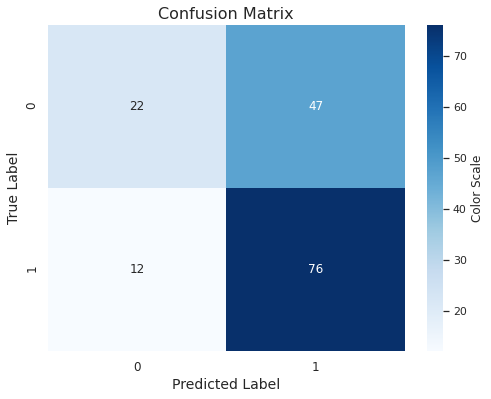

In [96]:
# Построение матрицы ошибок
conf_matrix = confusion_matrix(y_test, y_pred)

# Создание графика
plt.figure(figsize=(8, 6))
ax = sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', 
                 cbar_kws={'label': 'Color Scale'})

# Настройка заголовков и подписей
ax.set_xlabel('Predicted Label', fontsize=14)
ax.set_ylabel('True Label', fontsize=14)
ax.set_title('Confusion Matrix', fontsize=16)

# Настройка размера шрифтов и отображения
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

В данном случае:

- True Positives (TP) = 76: Модель правильно классифицировала 76 положительных примеров.
- False Negatives (FN) = 12: Модель неправильно классифицировала 12 положительных примеров как отрицательные.
- False Positives (FP) = 47: Модель неправильно классифицировала 47 отрицательных примеров как положительные.
- True Negatives (TN) = 22: Модель правильно классифицировала 22 отрицательных примера.

 Модель неправильно классифицировала 47 положительных примеров как отрицательные.
 - Accuracy:(0.62) относительно невысока.

- Полнота (0.86) высока, что говорит о том, что модель хорошо находит положительные примеры и не упускает их в значительной степени.

- **Точность (0.61) ниже, чем полнота, что указывает на то, что хотя модель часто правильно находит положительные примеры, она также делает немало ошибок, предсказывая отрицательные примеры как положительные, этот параметр для нас наиболее критичен, так как для заказчика главное - вкус молока.**
 

In [97]:
# Получение вероятностей предсказания
y_proba = clf.predict_proba(X_test_processed)[:, 1]

# Создание датафрейма с вероятностями и истинными значениями
data = pd.DataFrame({'Actual': y_test, 'Probability': y_proba}).sort_values(by='Probability', ascending=False)

data.head()




Actual  Probability
597     1.0     0.854097
310     1.0     0.853207
56      1.0     0.839449
63      1.0     0.832028
271     1.0     0.812705

In [98]:
# Создание списка порогов
thresholds = [round(i, 2) for i in np.linspace(0.65, 0.85, num=20, endpoint=False)]
thresholds


[0.65,
 0.66,
 0.67,
 0.68,
 0.69,
 0.7,
 0.71,
 0.72,
 0.73,
 0.74,
 0.75,
 0.76,
 0.77,
 0.78,
 0.79,
 0.8,
 0.81,
 0.82,
 0.83,
 0.84]

In [99]:
# Добавление новых столбцов с предсказаниями
for threshold in thresholds:
    data[f'Pred_{threshold}'] = data['Probability'].apply(lambda x: 1 if x > threshold else 0)

# Создание датафрейма для хранения значений Precision
precision_df = pd.DataFrame(columns=['Threshold', 'Precision'])

# Вычисление Precision для каждого порога
for column_name in data.columns[2:]:
    threshold = float(column_name.split('_')[1])
    precision = precision_score(data['Actual'], data[column_name])
    precision_df = precision_df.append({'Threshold': threshold, 'Precision': precision}, ignore_index=True)

precision_df

Threshold  Precision
0        0.65   0.761194
1        0.66   0.766667
2        0.67   0.767857
3        0.68   0.773585
4        0.69   0.833333
5        0.70   0.863636
6        0.71   0.857143
7        0.72   0.846154
8        0.73   0.857143
9        0.74   0.875000
10       0.75   0.851852
11       0.76   0.863636
12       0.77   0.842105
13       0.78   0.875000
14       0.79   0.846154
15       0.80   1.000000
16       0.81   1.000000
17       0.82   1.000000
18       0.83   1.000000
19       0.84   1.000000

Порог = 0.8, при котором минимизируется критическая для нас ошибка первого рода

In [100]:
cow_buy_new2 = cow_buy_new[cow_buy_new.columns]
cow_buy_new2.head()

poroda pastbishche dad_breed  dad_name   fat  protein  \
0   вис бик айдиал   холмистое    айдиал  геркулес  3.58    3.076   
1   вис бик айдиал   равнинное   соверин    буйный  3.54    3.081   
2  рефлешнсоверинг   равнинное   соверин     барин  3.59    3.074   
3  рефлешнсоверинг   холмистое    айдиал    буйный  3.40    3.061   
4  рефлешнсоверинг   равнинное    айдиал    буйный  3.64    3.074   

           age        eke    protein_g       spo  spo_binary  eke_squared  \
0  более_2_лет  15.276162  2019.947532  0.958744           1   233.361138   
1  менее_2_лет  15.276162  2019.947532  0.958744           1   233.361138   
2  более_2_лет  15.276162  2019.947532  0.958744           1   233.361138   
3  более_2_лет  15.276162  2019.947532  0.958744           1   233.361138   
4  более_2_лет  15.276162  2019.947532  0.958744           1   233.361138   

       udoy_kg  
0  6609.919297  
1  6378.711028  
2  6283.999775  
3  6593.089377  
4  6542.146066

In [101]:

X_cow_buy_ohe = encoder.transform(cow_buy_new[cat_col_names])


encoder_col_names = encoder.get_feature_names_out()
encoder_col_names

array(['poroda_рефлешнсоверинг', 'pastbishche_холмистое',
       'age_менее_2_лет', 'spo_binary_1', 'dad_name_буйный',
       'dad_name_геркулес', 'dad_name_соловчик', 'dad_breed_соверин'],
      dtype=object)

In [102]:
X_cow_buy_scaled = scaler.transform(cow_buy_new[num_col_names])

In [103]:
X_test_ohe = pd.DataFrame(X_cow_buy_ohe, columns=encoder_col_names)
X_test_scaled = pd.DataFrame(X_cow_buy_scaled, columns=num_col_names)

X_test = pd.concat([X_test_ohe, X_test_scaled], axis=1)

In [104]:
predictions_taste = clf.predict_proba(X_test)[:,1] > 0.7
predictions_taste  = ['Вкусное' if x==True else 'Не вкусное' for x in predictions_taste]
predictions_taste

['Вкусное',
 'Не вкусное',
 'Не вкусное',
 'Не вкусное',
 'Не вкусное',
 'Не вкусное',
 'Вкусное',
 'Не вкусное',
 'Не вкусное',
 'Вкусное',
 'Не вкусное',
 'Не вкусное',
 'Не вкусное',
 'Не вкусное',
 'Не вкусное',
 'Не вкусное',
 'Не вкусное',
 'Не вкусное',
 'Не вкусное',
 'Не вкусное']

Согласно результатам в cow_buy.csv 3 подходящих коровы по вкусу молока.

In [105]:
predictions_df = pd.DataFrame({'Predictions': predictions_taste})
cow_buy_new_with_predictions = pd.concat([cow_buy_new, predictions_df], axis=1)
tasteful_cows = cow_buy_new_with_predictions[cow_buy_new_with_predictions['Predictions'] == 'Вкусное']
tasteful_cows

poroda pastbishche dad_breed  dad_name   fat  protein  \
0   вис бик айдиал   холмистое    айдиал  геркулес  3.58    3.076   
6   вис бик айдиал   холмистое    айдиал  геркулес  3.58    3.076   
9  рефлешнсоверинг   холмистое    айдиал    буйный  3.40    3.079   

           age        eke    protein_g       spo  spo_binary  eke_squared  \
0  более_2_лет  15.276162  2019.947532  0.958744           1   233.361138   
6  более_2_лет  15.276162  2019.947532  0.958744           1   233.361138   
9  менее_2_лет  15.276162  2019.947532  0.958744           1   233.361138   

       udoy_kg Predictions  
0  6609.919297     Вкусное  
6  6609.919297     Вкусное  
9  6400.540668     Вкусное

## Итоговые выводы

In [106]:
result['Вкус'] = predictions_taste
result

poroda pastbishche dad_breed  dad_name   fat  protein  \
0    вис бик айдиал   холмистое    айдиал  геркулес  3.58    3.076   
1    вис бик айдиал   равнинное   соверин    буйный  3.54    3.081   
2   рефлешнсоверинг   равнинное   соверин     барин  3.59    3.074   
3   рефлешнсоверинг   холмистое    айдиал    буйный  3.40    3.061   
4   рефлешнсоверинг   равнинное    айдиал    буйный  3.64    3.074   
5   рефлешнсоверинг   равнинное   соверин  геркулес  3.63    3.053   
6    вис бик айдиал   холмистое    айдиал  геркулес  3.58    3.076   
7    вис бик айдиал   равнинное   соверин    буйный  3.57    3.079   
8   рефлешнсоверинг   равнинное   соверин     барин  3.59    3.074   
9   рефлешнсоверинг   холмистое    айдиал    буйный  3.40    3.079   
10   вис бик айдиал   холмистое   соверин  соловчик  3.73    3.055   
11  рефлешнсоверинг   равнинное   соверин  геркулес  3.73    3.073   
12   вис бик айдиал   холмистое    айдиал  геркулес  3.68    3.046   
13   вис бик айдиал   холмистое   соверин     барин  3.42    3.075   
14  рефлешнсоверинг   равнинное   соверин     барин  3.59    3.074   
15  рефлешнсоверинг   холмистое    айдиал    буйный  3.40    3.065   
16   вис бик айдиал   холмистое   соверин  соловчик  3.73    3.079   
17  рефлешнсоверинг   равнинное   соверин  геркулес  3.77    3.053   
18   вис бик айдиал   равнинное   соверин    буйный  3.34    3.069   
19  рефлешнсоверинг   равнинное    айдиал    буйный  3.64    3.074   

            age      udoy_kg        Вкус  
0   более_2_лет  6609.919297     Вкусное  
1   менее_2_лет  6378.711028  Не вкусное  
2   более_2_лет  6283.999775  Не вкусное  
3   более_2_лет  6593.089377  Не вкусное  
4   более_2_лет  6542.146066  Не вкусное  
5   менее_2_лет  6425.380218  Не вкусное  
6   более_2_лет  6609.919297     Вкусное  
7   более_2_лет  6571.259737  Не вкусное  
8   более_2_лет  6283.999775  Не вкусное  
9   менее_2_лет  6400.540668     Вкусное  
10  более_2_лет  6344.707860  Не вкусное  
11  более_2_лет  6617.928926  Не вкусное  
12  более_2_лет  6609.919297  Не вкусное  
13  менее_2_лет  6127.474742  Не вкусное  
14  более_2_лет  6283.999775  Не вкусное  
15  более_2_лет  6593.089377  Не вкусное  
16  более_2_лет  6344.707860  Не вкусное  
17  менее_2_лет  6425.380218  Не вкусное  
18  более_2_лет  6571.259737  Не вкусное  
19  более_2_лет  6542.146066  Не вкусное

In [107]:
# Фильтрация коров с удоем больше 6000 и вкусным молоком
filtered_cows = result[(result['udoy_kg'] > 6000) & (result['Вкус'] == 'Вкусное')]
filtered_cows

poroda pastbishche dad_breed  dad_name   fat  protein  \
0   вис бик айдиал   холмистое    айдиал  геркулес  3.58    3.076   
6   вис бик айдиал   холмистое    айдиал  геркулес  3.58    3.076   
9  рефлешнсоверинг   холмистое    айдиал    буйный  3.40    3.079   

           age      udoy_kg     Вкус  
0  более_2_лет  6609.919297  Вкусное  
6  более_2_лет  6609.919297  Вкусное  
9  менее_2_лет  6400.540668  Вкусное

**Согласно результатам 3 коровы, которые удовлетворяют одновременно двум условиям (Удой больше 6000 и Вкусное молоко)**

## Предобработка данных

- Проведено переименование столбцов в трех датафреймах (`ferma_main`, `ferma_dad`, `cow_buy`) для единообразия.
- Преобразование строковых представлений чисел в формат `float` для столбцов, содержащих числовые данные (eke, spo, fat, protein).
- Все строковые значения в датафреймах были преобразованы в нижний регистр.
- Проверены датафреймы на наличие явных дубликатов:
  - `ferma_main`: обнаружены и удалены 5 дубликатов.
  - `ferma_dad`: не найдено явных дубликатов.
  - `cow_buy`: обнаружены 4 дубликата, но они оставлены, так как датафрейм содержит ограниченное количество записей.
- В `ferma_main` выполнена замена неявных дубликатов в столбцах `pastbishche` и `dad_breed`.

## Анализ данных

Анализ данных показал следующее:

- Большинство признаков имеют нормальное распределение и не содержат выбросов, за исключением одного аномального значения признака "удой". Это значение было удалено из датасета.
- При корреляционном анализе были обнаружены следующие взаимосвязи:
  - Положительная зависимость между удоем и другими признаками, такими как эке, спо и жирность.
  - Сильная взаимосвязь между возрастом и удоем.
  - Умеренная корреляция между некоторыми признаками, но явных признаков сильной мультиколлинеарности не было обнаружено.

## Моделирование

### Регрессия

Для решения задачи регрессии были обучены три модели линейной регрессии. Лучшая модель была выбрана на основе следующих метрик качества:

- **MSE** = 35977.91
- **MAE** = 146.56
- **RMSE** = 189.68

В эту модель для улучшения качества был добавлен параметр "СПО" в качестве категориального признака, а параметры "ЭКЕ" возведен в квадрат. Коэффициент детерминации (R²) составил 0.82. Остатки распределены нормально, без смещений, а доверительный интервал для прогнозов удоя составил (5796.5718 ; 6530.9478). Прогнозные значения удоя для коров варьируются в диапазоне до 6530 литров, в этом диапазоне 11 коров.

### Классификация

Для решения задачи классификации были подобраны параметры и обучена модель логистической регрессии. Модель была проанализирована и ошибка первого рода была уменьшена. Также был определен порог в 0.7, минимизирующий ошибку прогнозирования вкуса молока.

В итоге было обнаружено, что **можно рекомендовать заказчику 3 коровы, которые удовлетворяют одновременно двум условиям (Удой больше 6000 и Вкусное молоко)**
